## **1. Importando librerías**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

## **2. Llamando los datos**

In [2]:
#identify the current working directory
path = os.getcwd()
path_file = os.path.join(path, "Data","car_details_v4.csv")

data = pd.read_csv(path_file)
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


## **3. Describiendo los datos**

In [3]:
#Shape of the data
data.shape

(2059, 20)

In [4]:
#Describir los datos mediante estadística descriptiva
data.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


## **4.Modificación de los datos.**

In [264]:
data_ = data.copy()

#Modificar los precios de "Price" a miles
data_["Price"] = data["Price"]/1000

#Modificar los Kilometers de "KM" a miles
data_["Kilometer"] = data["Kilometer"]/1000

#Modificar el año a formato fecha
data_["Year"] = pd.to_datetime(data["Year"], utc=False, format="%Y").dt.year

#Engine Power a formato numérico
data_["Engine"] = data["Engine"].str.split().str[0]
data_["Engine"] = pd.to_numeric(data_["Engine"], errors='coerce')

#Create a new column "bhp" and "rpm"
data_["bhp_power"] = data["Max Power"].apply(lambda x: str(x).split("@")[0].split()[0] if isinstance(x, (str)) and "@" in str(x) else None)
data_["bhp_power"] = pd.to_numeric(data_["bhp_power"], errors='coerce')

data_["rpm_power"] = data["Max Power"].apply(lambda x: str(x).split("@")[1].strip().split()[0] if isinstance(x, str) and "@" in x and len(x.split("@")) > 1 and len(x.split("@")[1].strip().split()) > 0 else None)
data_["rpm_power"] = pd.to_numeric(data_["rpm_power"], errors='coerce')

#Create a new column "Nm" and "rpm"
data_["Nm_torque"] = data["Max Torque"].apply(lambda x: str(x).split("@")[0].split()[0] if isinstance(x, (str)) and "@" in str(x) else None)
data_["Nm_torque"] = pd.to_numeric(data_["Nm_torque"], errors='coerce')

data_["rpm_torque"] = data["Max Torque"].apply(lambda x: str(x).split("@")[1].strip().split()[0] if isinstance(x, str) and "@" in x and len(x.split("@")) > 1 and len(x.split("@")[1].strip().split()) > 0 else None)
data_["rpm_torque"] = pd.to_numeric(data_["rpm_torque"], errors='coerce')

In [150]:
data_.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,bhp_power,rpm_power,Nm_torque,rpm_torque
0,Honda,Amaze 1.2 VX i-VTEC,505.0,2017,87.15,Petrol,Manual,Pune,Grey,First,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500.0
1,Maruti Suzuki,Swift DZire VDI,450.0,2014,75.00,Diesel,Manual,Ludhiana,White,Second,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000.0
2,Hyundai,i10 Magna 1.2 Kappa2,220.0,2011,67.00,Petrol,Manual,Lucknow,Maroon,First,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.7619,4000.0
3,Toyota,Glanza G,799.0,2019,37.50,Petrol,Manual,Mangalore,Red,First,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950.0,2018,69.00,Diesel,Manual,Mumbai,Grey,First,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400.0


In [13]:
#Describir los datos modificador mediante estadística descriptiva
data_.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2059.000000,2059.000000,2059.000000,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1702.991696,2016.425449,54.224714,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2419.880635,3.363564,57.361721,442.458507,135.265825,136.073956,0.822170,15.110198
min,49.000000,1988.000000,0.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,484.999000,2014.000000,29.000000,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,825.000000,2017.000000,50.000000,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1925.000000,2019.000000,72.000000,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,35000.000000,2022.000000,2000.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000


## **5. Análisis univariado de las variables de interés**

### **5.1 Numerical variables**

##### **5.1.1 Análisis univariado del precio**

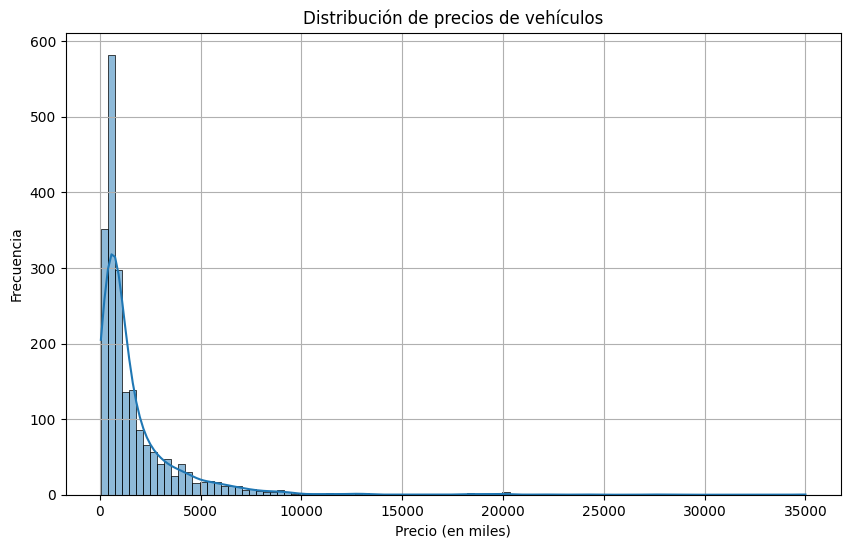

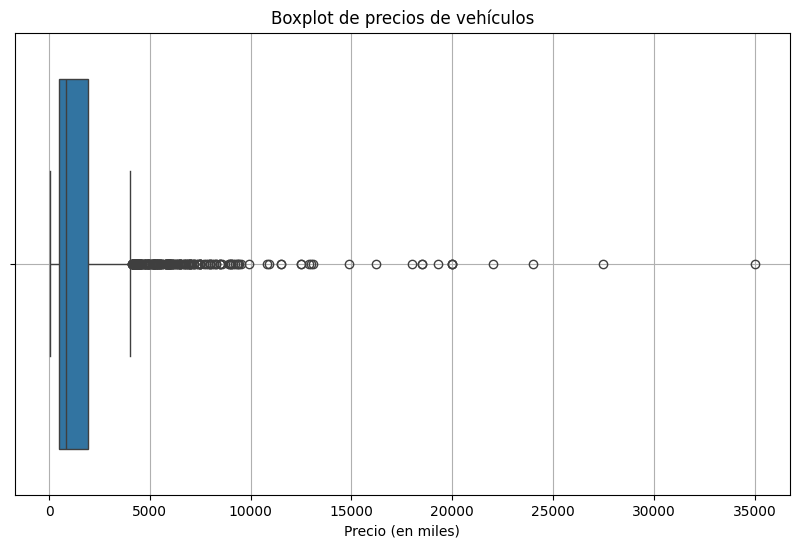

In [23]:
bin_max = 1000
bins = 100
#Análisis de precios
plt.figure(figsize=(10,6))
sns.histplot(data=data_, x="Price", bins= bins, kde=True)
plt.title("Distribución de precios de vehículos")
plt.xlabel("Precio (en miles)")
plt.ylabel("Frecuencia")
#plt.xlim(0, bin_max)
plt.grid()
plt.show()

#Box plot de precios
plt.figure(figsize=(10,6))
sns.boxplot(data=data_, x="Price")
plt.title("Boxplot de precios de vehículos")
plt.xlabel("Precio (en miles)")
#plt.xlim(0, bin_max)
plt.grid()
plt.show()

##### **5.1.2 Análisis univariado del año**

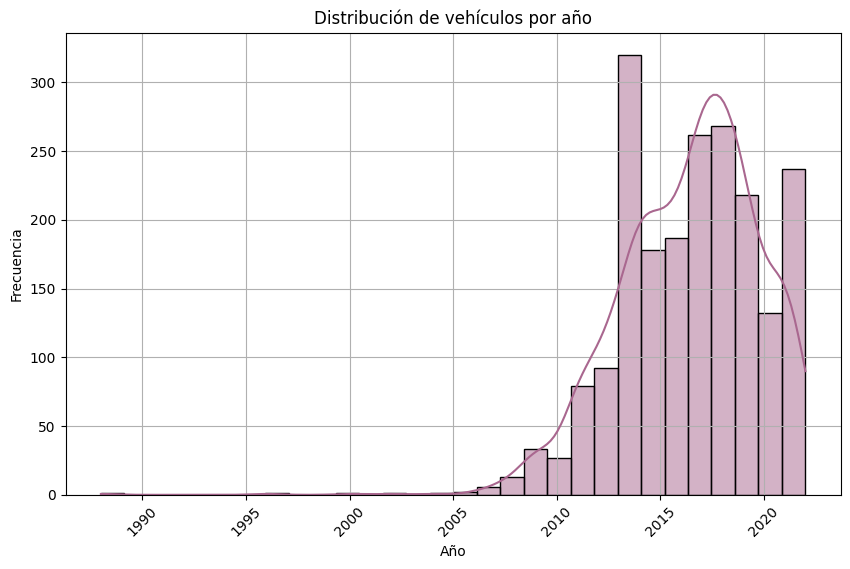

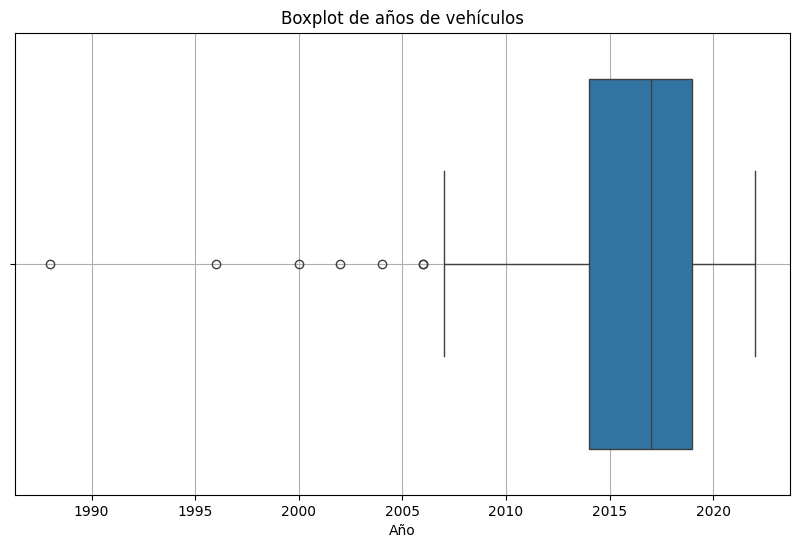

In [15]:
#Histplot de años
plt.figure(figsize=(10,6))
cubehelix = sns.cubehelix_palette(as_cmap=True)
sns.histplot(data=data_, x="Year", bins=30, kde=True, color=cubehelix(0.5))
plt.title("Distribución de vehículos por año")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid()
plt.show()

#Boxplot de años
plt.figure(figsize=(10,6))
sns.boxplot(data=data_, x="Year")
plt.title("Boxplot de años de vehículos")
plt.xlabel("Año")
plt.grid()
plt.show()

##### **5.1.3 Análisis univariado de los kilómetros recorridos**

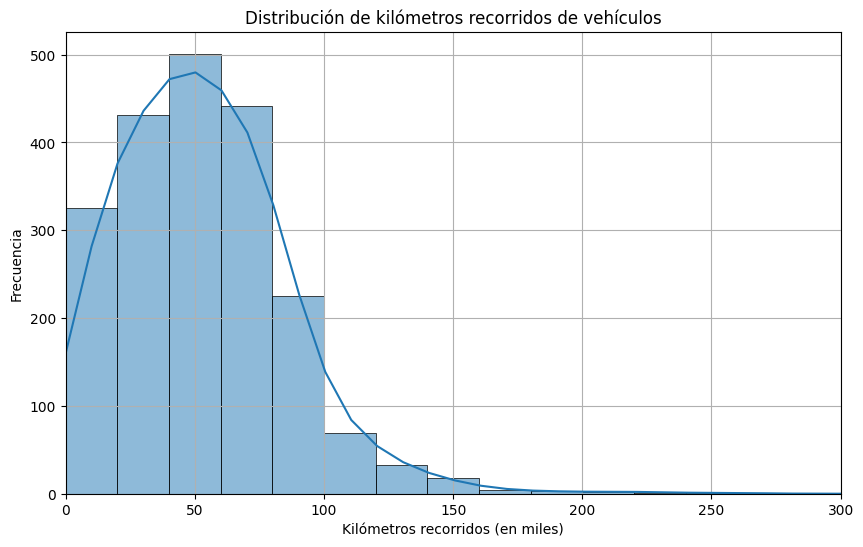

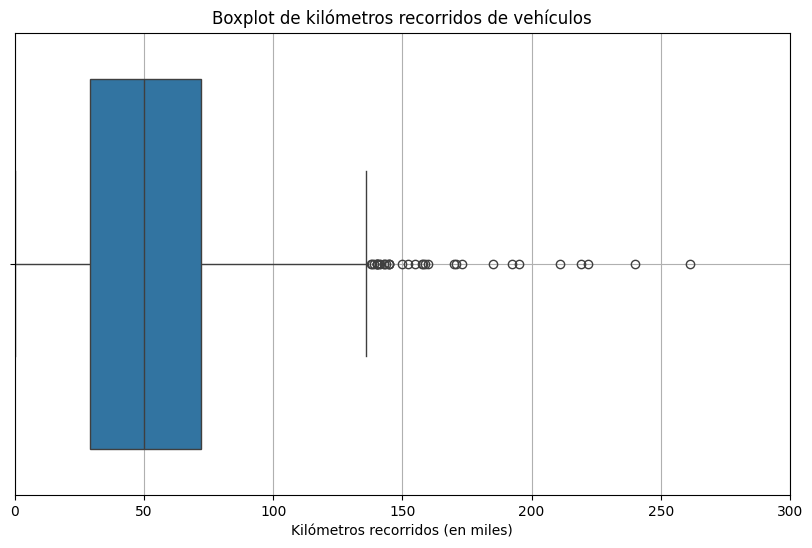

In [24]:
#Análisis univariado de los kilómetros recorridos
plt.figure(figsize=(10,6))
sns.histplot(data=data_, x="Kilometer", bins=100, kde=True)
plt.title("Distribución de kilómetros recorridos de vehículos")
plt.xlabel("Kilómetros recorridos (en miles)")
plt.ylabel("Frecuencia")
plt.xlim(0, 300)
plt.grid()
plt.show()

#Box plot de kilómetros recorridos
plt.figure(figsize=(10,6))
sns.boxplot(data=data_, x="Kilometer")
plt.title("Boxplot de kilómetros recorridos de vehículos")
plt.xlabel("Kilómetros recorridos (en miles)")
plt.xlim(0, 300)
plt.grid()
plt.show()

##### **5.1.4 Análisis univariado de los Engine**

         Intervalo  Frecuencia  Frecuencia Acumulada  Frecuencia Relativa  \
0    624.0 - 877.0          55                    55             0.027792   
1   877.0 - 1130.0         194                   249             0.098029   
2  1130.0 - 1383.0         516                   765             0.260738   
3  1383.0 - 1636.0         420                  1185             0.212228   
4  1636.0 - 1889.0          41                  1226             0.020718   

   Frecuencia Relativa Acumulada  Frecuencia Relativa Porcentual %  \
0                       0.027792                          2.779181   
1                       0.125821                          9.802931   
2                       0.386559                         26.073775   
3                       0.598787                         21.222840   
4                       0.619505                          2.071753   

   Frecuencia Relativa Porcentual Acumulada %  
0                                    2.779181  
1                   

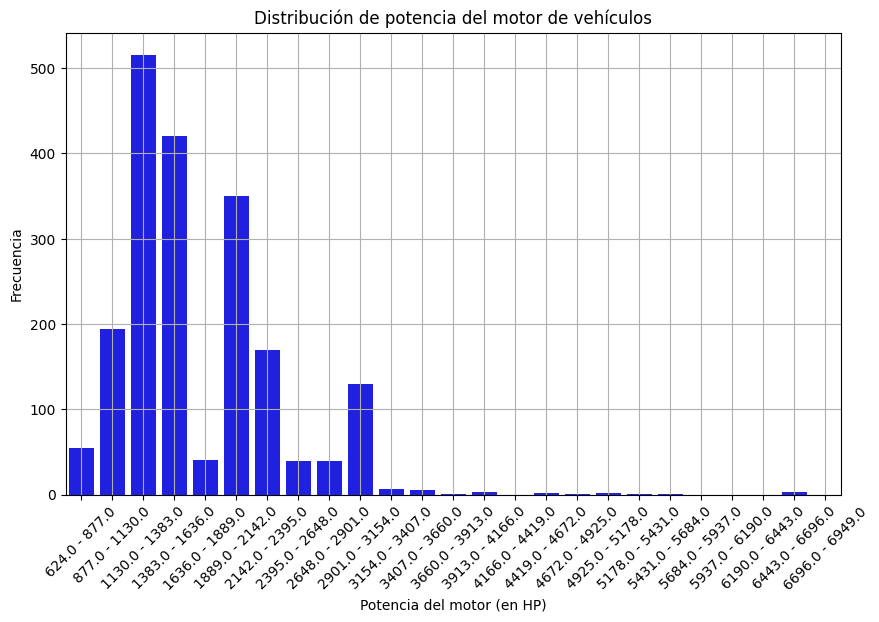

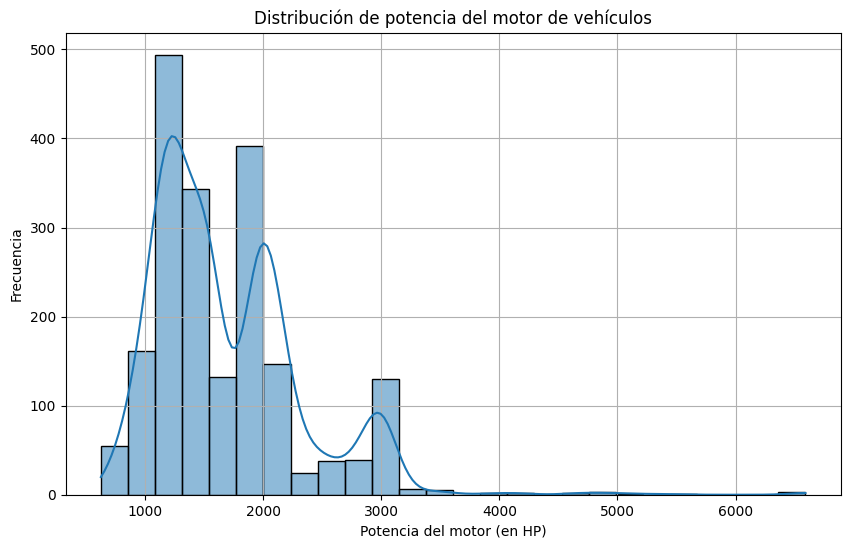

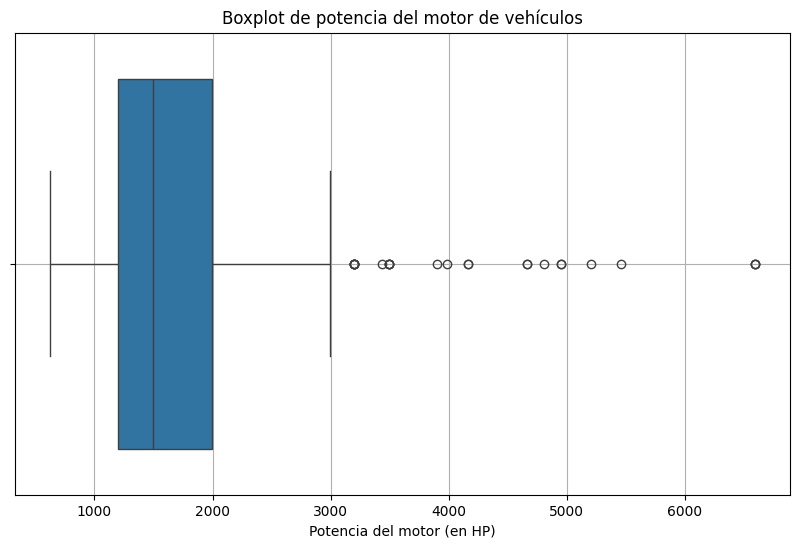

In [ ]:
#Create a new interval frequency table of Engine
#Creación de intervalos
max_data = data_["Engine"].max()
min_data = data_["Engine"].min()

k = 1 + 3.322 * np.log(data_["Engine"].size)
k = k.astype(int)
j = int((max_data/k))

intervalos = [min_data+i*j for i in range(0, k)]
conteo,_ = np.histogram(data_["Engine"].values, bins=intervalos)

#Creación de la tabla de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Intervalo': [f"{intervalos[i]} - {intervalos[i+1]}" for i in range(len(intervalos)-1)],
    'Frecuencia': conteo
})

tabla_frecuencias['Frecuencia Acumulada'] = tabla_frecuencias['Frecuencia'].cumsum()
tabla_frecuencias['Frecuencia Relativa'] = tabla_frecuencias['Frecuencia'] / tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa Acumulada'] = tabla_frecuencias['Frecuencia Relativa'].cumsum()
tabla_frecuencias['Frecuencia Relativa Porcentual %'] = tabla_frecuencias['Frecuencia Relativa'] * 100
tabla_frecuencias['Frecuencia Relativa Porcentual Acumulada %'] = tabla_frecuencias['Frecuencia Relativa Acumulada'] * 100

print(tabla_frecuencias.head(5))

#Análisis univariado de barplot de tabla_frecuencias
plt.figure(figsize=(10,6))
sns.barplot(x='Intervalo', y='Frecuencia', data=tabla_frecuencias, color='blue')
plt.title("Distribución de potencia del motor de vehículos")
plt.xlabel("Potencia del motor (en HP)")
plt.ylabel("Frecuencia")
#plt.xlim(0, 100)
plt.xticks(rotation=45)
plt.grid()
plt.show()

#Análisis univariado de Engine
plt.figure(figsize=(10,6))
sns.histplot(data=data_, x="Engine", bins=k, kde=True)
plt.title("Distribución de potencia del motor de vehículos")
plt.xlabel("Potencia del motor (en HP)")
plt.ylabel("Frecuencia")
#plt.xlim(0, 1000)
plt.grid()
plt.show()

#Box plot de Engine
plt.figure(figsize=(10,6))
sns.boxplot(data=data_, x="Engine")
plt.title("Boxplot de potencia del motor de vehículos")
plt.xlabel("Potencia del motor (en HP)")
#plt.xlim(0, 1000)
plt.grid()
plt.show()


##### **5.1.5 Análisis univariado de la variable bph_power**

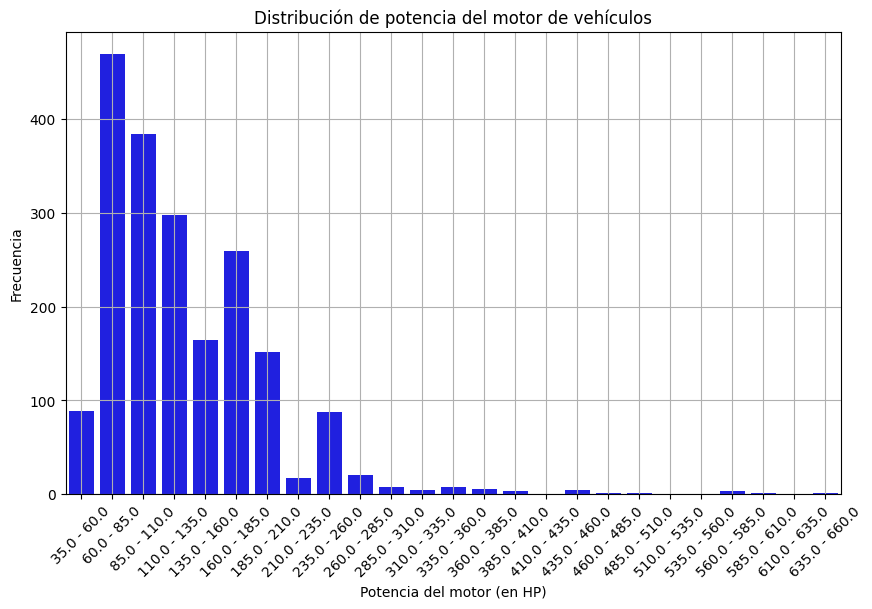

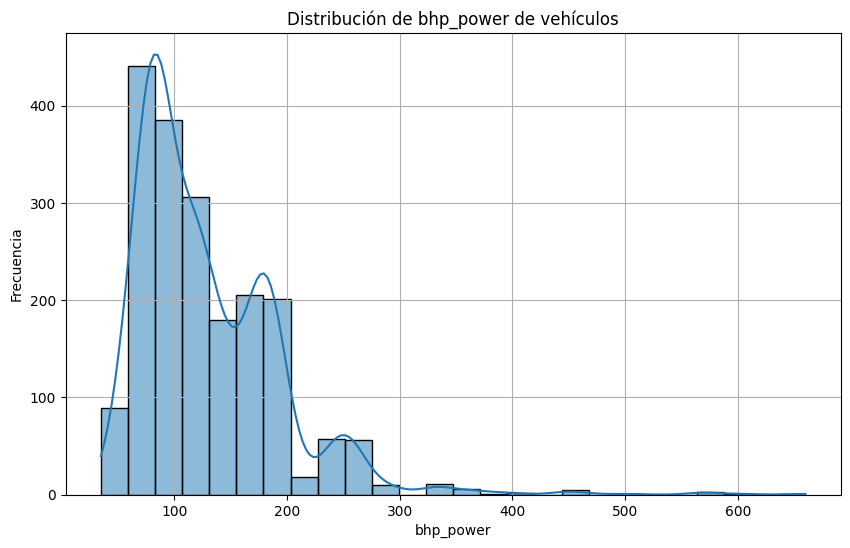

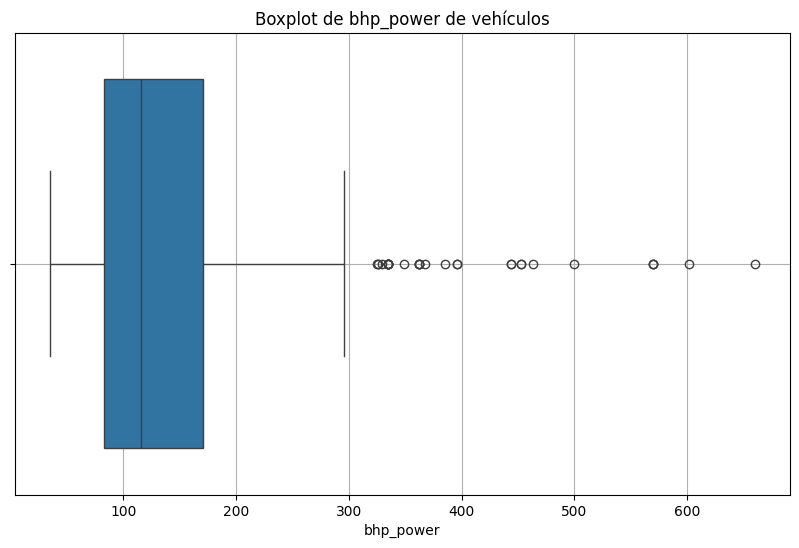

In [162]:
#Create a new interval frequency table of Engine
#Creación de intervalos
max_data = data_["bhp_power"].max()
min_data = data_["bhp_power"].min()

k = 1 + 3.322 * np.log(data_["bhp_power"].size)
k = k.astype(int)

j = int((max_data/k))

intervalos = [min_data+i*j for i in range(0, k)]
conteo,_ = np.histogram(data_["bhp_power"].values, bins=intervalos)

#Creación de la tabla de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Intervalo': [f"{intervalos[i]} - {intervalos[i+1]}" for i in range(len(intervalos)-1)],
    'Frecuencia': conteo
})

tabla_frecuencias['Frecuencia Acumulada'] = tabla_frecuencias['Frecuencia'].cumsum()
tabla_frecuencias['Frecuencia Relativa'] = tabla_frecuencias['Frecuencia'] / tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa Acumulada'] = tabla_frecuencias['Frecuencia Relativa'].cumsum()
tabla_frecuencias['Frecuencia Relativa Porcentual %'] = tabla_frecuencias['Frecuencia Relativa'] * 100
tabla_frecuencias['Frecuencia Relativa Porcentual Acumulada %'] = tabla_frecuencias['Frecuencia Relativa Acumulada'] * 100


#Análisis univariado de barplot de tabla_frecuencias
plt.figure(figsize=(10,6))
sns.barplot(x='Intervalo', y='Frecuencia', data=tabla_frecuencias, color='blue')
plt.title("Distribución de potencia del motor de vehículos")
plt.xlabel("Potencia del motor (en HP)")
plt.ylabel("Frecuencia")
#plt.xlim(0, 100)
plt.xticks(rotation=45)
plt.grid()
plt.show()


#Análisis univariado de los bhp_power
plt.figure(figsize=(10,6))
sns.histplot(data=data_, x="bhp_power", bins=k, kde=True)
plt.title("Distribución de bhp_power de vehículos")
plt.xlabel("bhp_power")
plt.ylabel("Frecuencia")
#plt.xlim(0, 300)
plt.grid()
plt.show()

#Análisis boxplot de los bhp_power
plt.figure(figsize=(10,6))
sns.boxplot(data=data_, x="bhp_power")
plt.title("Boxplot de bhp_power de vehículos")
plt.xlabel("bhp_power")
#plt.xlim(0, 300)
plt.grid()
plt.show()

##### **5.1.6 Análisis univariado de la variable rpm_power**

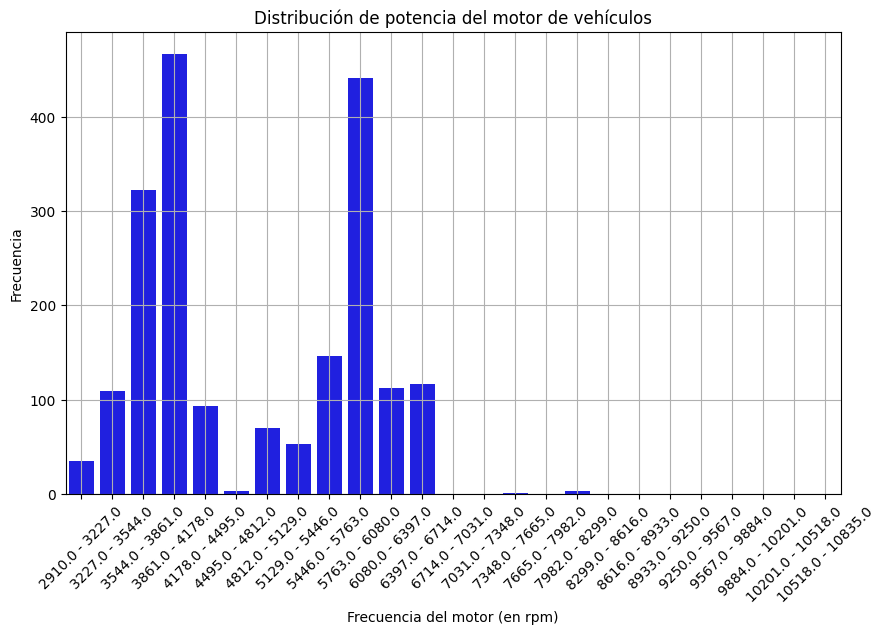

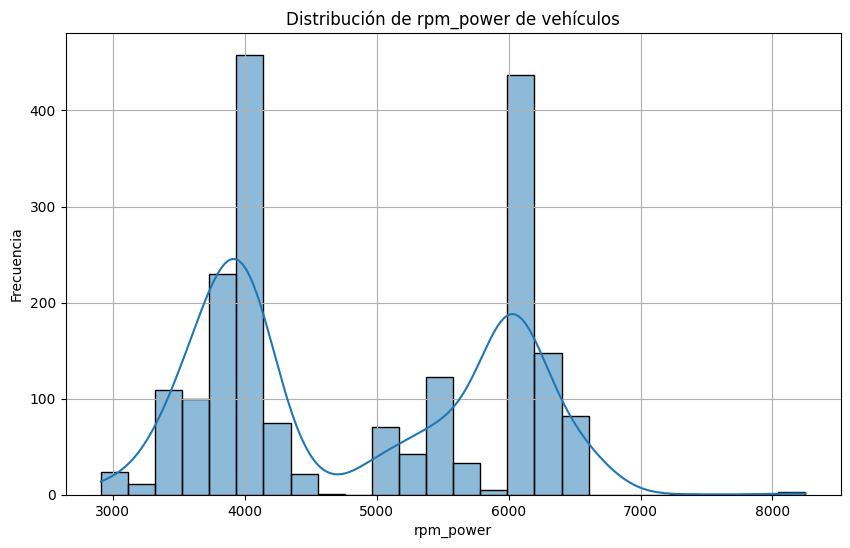

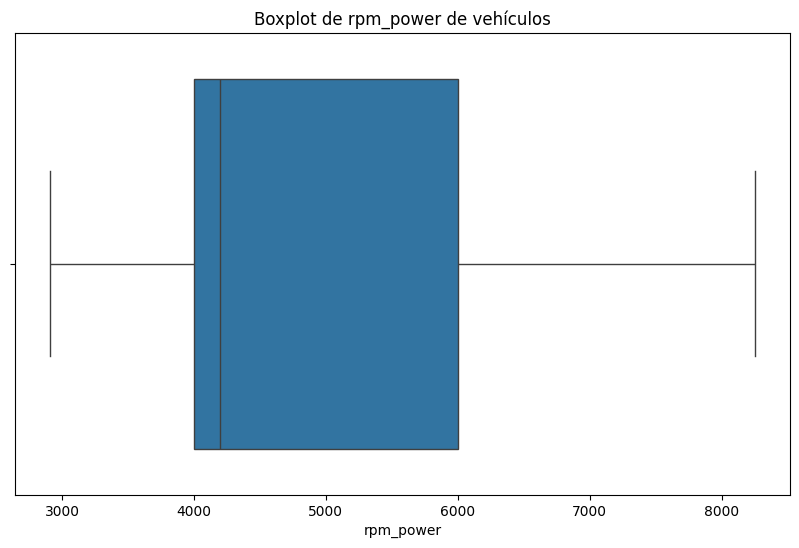

In [160]:
#Create a new interval frequency table of Engine
#Creación de intervalos
max_data = data_["rpm_power"].max()
min_data = data_["rpm_power"].min()

k = 1 + 3.322 * np.log(data_["rpm_power"].size)
k = k.astype(int)

j = int((max_data/k))

intervalos = [min_data+i*j for i in range(0, k)]
conteo,_ = np.histogram(data_["rpm_power"].values, bins=intervalos)

#Creación de la tabla de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Intervalo': [f"{intervalos[i]} - {intervalos[i+1]}" for i in range(len(intervalos)-1)],
    'Frecuencia': conteo
})

tabla_frecuencias['Frecuencia Acumulada'] = tabla_frecuencias['Frecuencia'].cumsum()
tabla_frecuencias['Frecuencia Relativa'] = tabla_frecuencias['Frecuencia'] / tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa Acumulada'] = tabla_frecuencias['Frecuencia Relativa'].cumsum()
tabla_frecuencias['Frecuencia Relativa Porcentual %'] = tabla_frecuencias['Frecuencia Relativa'] * 100
tabla_frecuencias['Frecuencia Relativa Porcentual Acumulada %'] = tabla_frecuencias['Frecuencia Relativa Acumulada'] * 100


#Análisis univariado de barplot de tabla_frecuencias
plt.figure(figsize=(10,6))
sns.barplot(x='Intervalo', y='Frecuencia', data=tabla_frecuencias, color='blue')
plt.title("Distribución de potencia del motor de vehículos")
plt.xlabel("Frecuencia del motor (en rpm)")
plt.ylabel("Frecuencia")
#plt.xlim(0, 100)
plt.xticks(rotation=45)
plt.grid()
plt.show()


#Análisis univariado de los bhp_power
plt.figure(figsize=(10,6))
sns.histplot(data=data_, x="rpm_power", bins=k, kde=True)
plt.title("Distribución de rpm_power de vehículos")
plt.xlabel("rpm_power")
plt.ylabel("Frecuencia")
#plt.xlim(0, 300)
plt.grid()
plt.show()

#Análisis boxplot de los bhp_power
plt.figure(figsize=(10,6))
sns.boxplot(data=data_, x="rpm_power")
plt.title("Boxplot de rpm_power de vehículos")
plt.xlabel("rpm_power")
#plt.xlim(0, 300)
#plt.grid()
plt.show()

##### **5.1.7 Análisis univariado de la variable Nm_Torque**

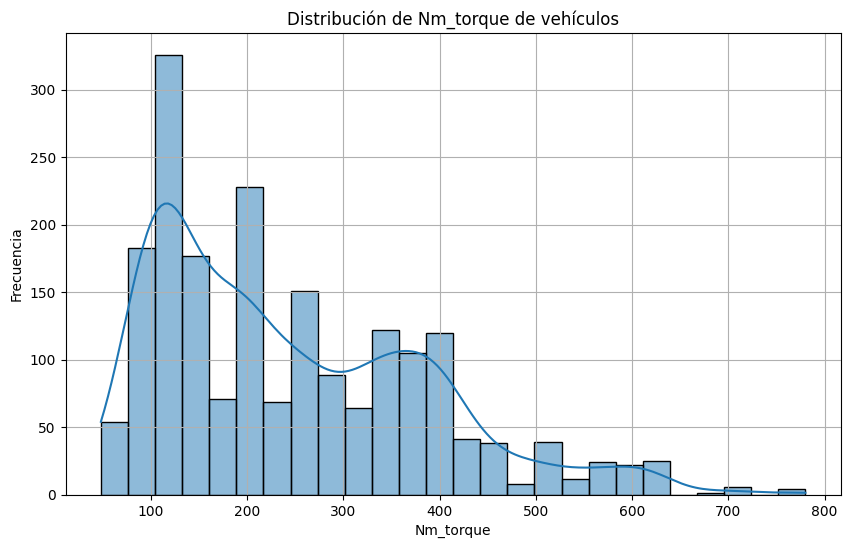

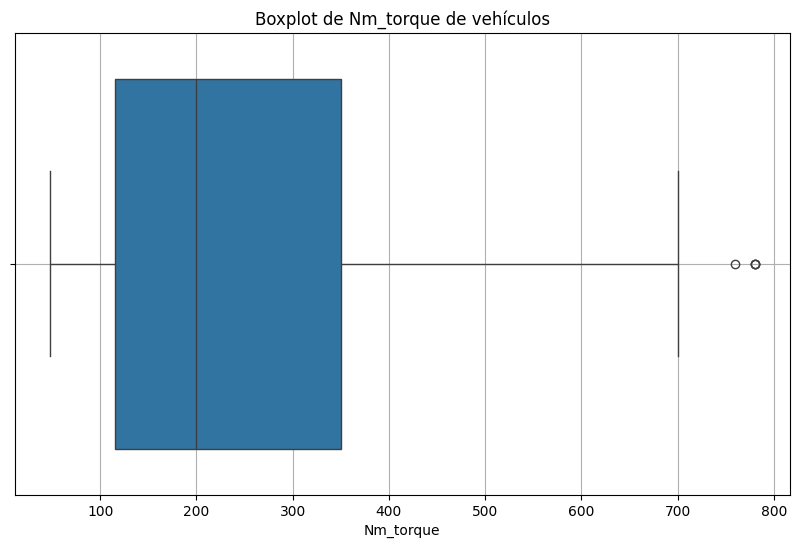

In [163]:
k = 1 + 3.322 * np.log(data_["Nm_torque"].size)
k = k.astype(int)

#Análisis univariado de los Nm_torque
plt.figure(figsize=(10,6))
sns.histplot(data=data_, x="Nm_torque", bins=k, kde=True)
plt.title("Distribución de Nm_torque de vehículos")
plt.xlabel("Nm_torque")
plt.ylabel("Frecuencia")
#plt.xlim(0, 300)
plt.grid()
plt.show()

#Boxplot de Nm_torque
plt.figure(figsize=(10,6))
sns.boxplot(data=data_, x="Nm_torque")
plt.title("Boxplot de Nm_torque de vehículos")
plt.xlabel("Nm_torque")
#plt.xlim(0, 300)
plt.grid()
plt.show()


##### **5.1.8 Análisis univariado de la variable rpm_torque**

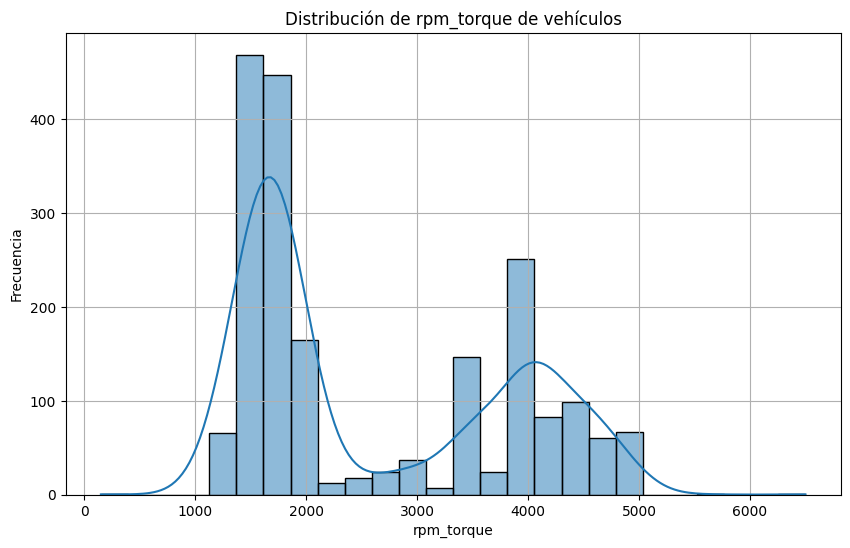

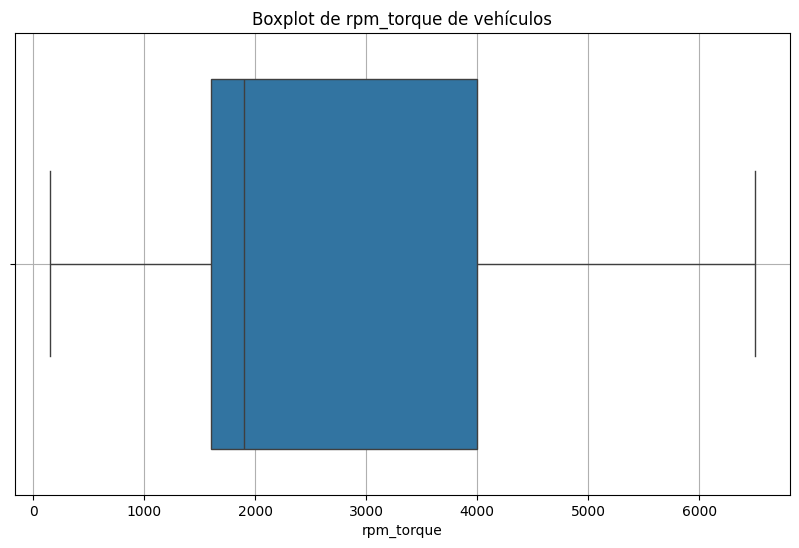

In [164]:
#Análisis univariado de los rpm_torque
plt.figure(figsize=(10,6))
sns.histplot(data=data_, x="rpm_torque", bins=k, kde=True)
plt.title("Distribución de rpm_torque de vehículos")
plt.xlabel("rpm_torque")
plt.ylabel("Frecuencia")
#plt.xlim(0, 300)
plt.grid()
plt.show()

#Boxplot de rpm_torque
plt.figure(figsize=(10,6))
sns.boxplot(data=data_, x="rpm_torque")
plt.title("Boxplot de rpm_torque de vehículos")
plt.xlabel("rpm_torque")
#plt.xlim(0, 300)
plt.grid()
plt.show()

##### **5.1.9 Análisis univariado Seating Capacity**

##### **5.1.10 Análisis univariado Fuel Tank Capacity**

### **5.2 Categorical variables**

##### **5.2.1 Análisis univariado de Drivetrain**

C:\Users\57317\AppData\Local\Temp\ipykernel_13164\2536169595.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  table_ = pd.value_counts(data_["Drivetrain"])
C:\Users\57317\AppData\Local\Temp\ipykernel_13164\2536169595.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=table_.index, y=table_.values, palette="viridis")


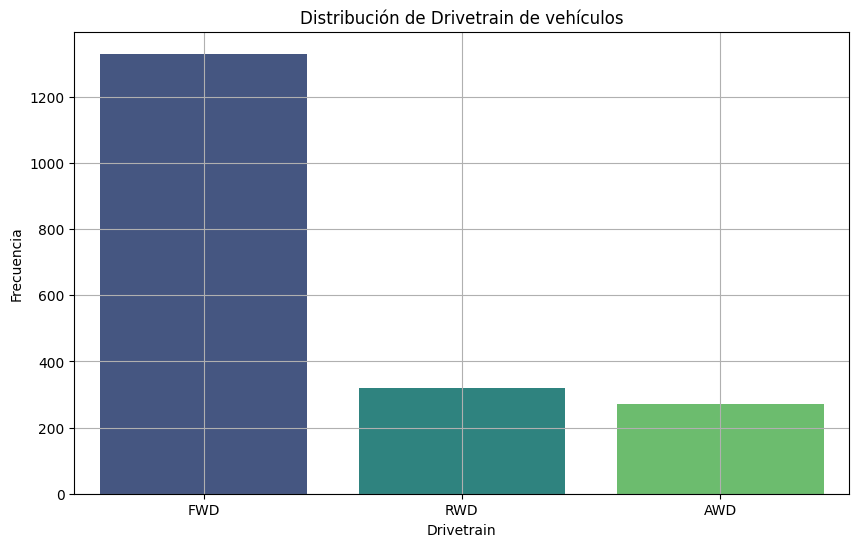

C:\Users\57317\AppData\Local\Temp\ipykernel_13164\2536169595.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_["Drivetrain"], y=data_["Price"], palette="viridis")


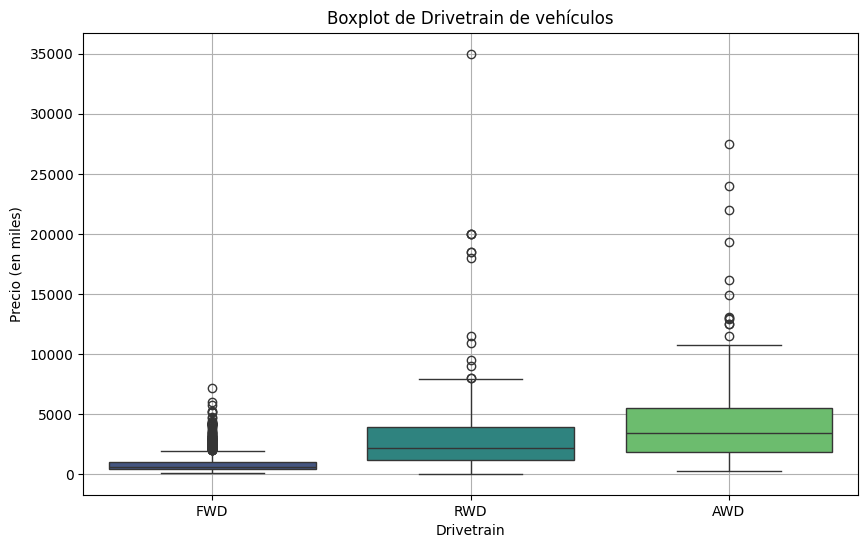

In [166]:
table_ = pd.value_counts(data_["Drivetrain"])

#Histplot de table_
plt.figure(figsize=(10,6))
sns.barplot(x=table_.index, y=table_.values, palette="viridis")
plt.title("Distribución de Drivetrain de vehículos")
plt.xlabel("Drivetrain")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

#Boxplot de table_
plt.figure(figsize=(10,6))
sns.boxplot(x=data_["Drivetrain"], y=data_["Price"], palette="viridis")
plt.title("Boxplot de Drivetrain de vehículos")
plt.xlabel("Drivetrain")
plt.ylabel("Precio (en miles)")
plt.grid()
plt.show()


##### **5.2.2 Análisis univariado de Transmission**

Transmission
Manual       55.03
Automatic    44.97
Name: proportion, dtype: float64


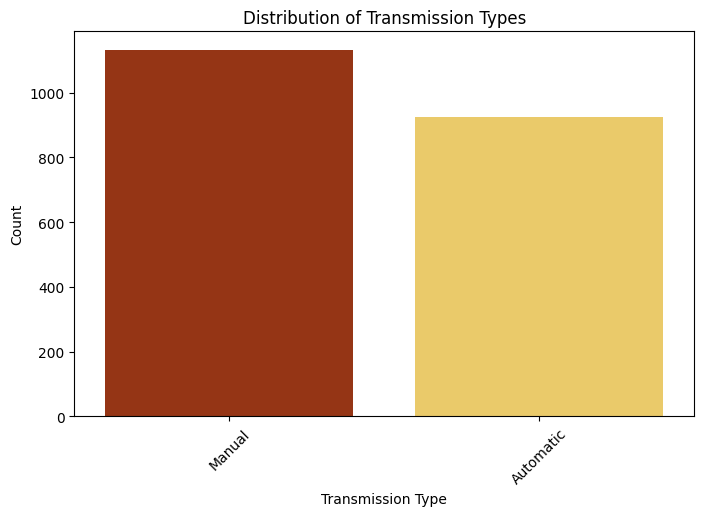

C:\Users\57317\AppData\Local\Temp\ipykernel_13164\2051112473.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_, x="Transmission", y="Price", palette="afmhot")


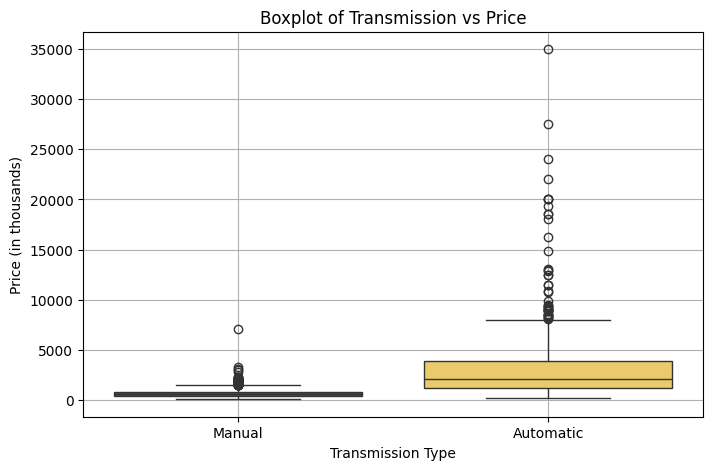

In [171]:
#Con respecto a la variable categórica "transmisión" "Transmission", se observa que la mayoría de los vehículos tienen una transmisión manual (Manual), representando el 70.53% del total. La transmisión automática (Automatic) representa el 29.47% restante. Esto indica que los vehículos con transmisión manual son más comunes en este conjunto de datos.
print(data_["Transmission"].value_counts(normalize=True).apply(lambda x: x*100).round(2))

#barplot the Transmission variable
plt.figure(figsize=(8,5))
sns.countplot(data=data_, x="Transmission", hue="Transmission", palette="afmhot")
plt.title("Distribution of Transmission Types")
plt.xlabel("Transmission Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

#boxplot of Transmission vs Price
plt.figure(figsize=(8,5))
sns.boxplot(data=data_, x="Transmission", y="Price", palette="afmhot")
plt.title("Boxplot of Transmission vs Price")
plt.xlabel("Transmission Type")
plt.ylabel("Price (in thousands)")
plt.grid()
plt.show()

##### **5.2.3 Análisis univariado Owner**

Owner
First               78.63
Second              18.12
Third                2.04
UnRegistered Car     1.02
Fourth               0.15
4 or More            0.05
Name: proportion, dtype: float64


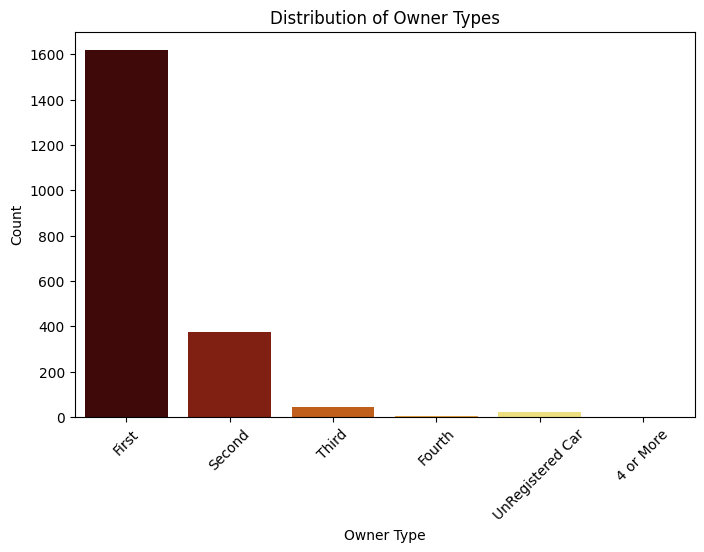

C:\Users\57317\AppData\Local\Temp\ipykernel_13164\180682578.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_, x="Owner", y="Price", palette="afmhot")


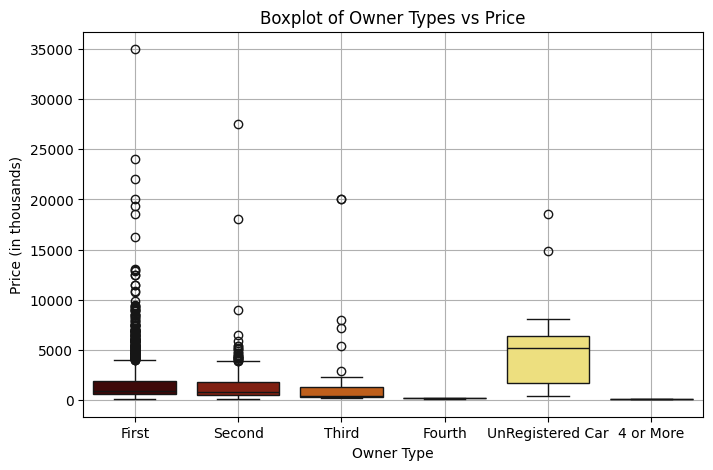

In [169]:
#Con respecto a los datos categóricos OwnerType, se observa que la mayoría de los vehículos son de primer dueño (First Owner), representando el 78.96% del total. Los vehículos de segundo dueño (Second Owner) constituyen el 14.29%, mientras que los de tercer dueño (Third Owner) representan el 4.95%. Los vehículos con más de tres dueños (Fourth & Above Owner) son los menos comunes, representando solo el 1.80% del total. Esto indica que la mayoría de los vehículos en este conjunto de datos tienen un historial de propiedad relativamente corto.
print(data_["Owner"].value_counts(normalize=True).apply(lambda x: x*100).round(2))

#plot the OwnerType variable
plt.figure(figsize=(8,5))
sns.countplot(data=data_, x="Owner", hue="Owner", palette="afmhot")
plt.title("Distribution of Owner Types")
plt.xlabel("Owner Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

#boxplot of OwnerType vs Price
plt.figure(figsize=(8,5))
sns.boxplot(data=data_, x="Owner", y="Price", palette="afmhot")
plt.title("Boxplot of Owner Types vs Price")
plt.xlabel("Owner Type")
plt.ylabel("Price (in thousands)")
plt.grid()
plt.show()

Seating Capacity
5.0    80.95
7.0    13.68
4.0     2.11
8.0     1.75
6.0     1.15
2.0     0.35
Name: proportion, dtype: float64


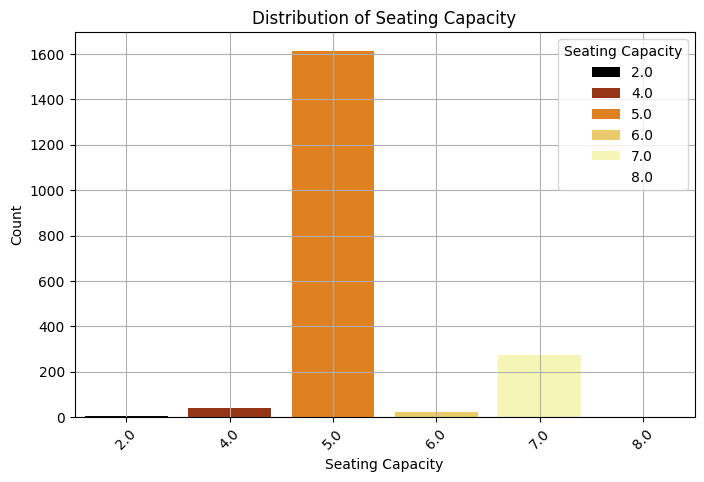

C:\Users\57317\AppData\Local\Temp\ipykernel_13164\3152136600.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_, x="Seating Capacity", y="Price", palette="afmhot")


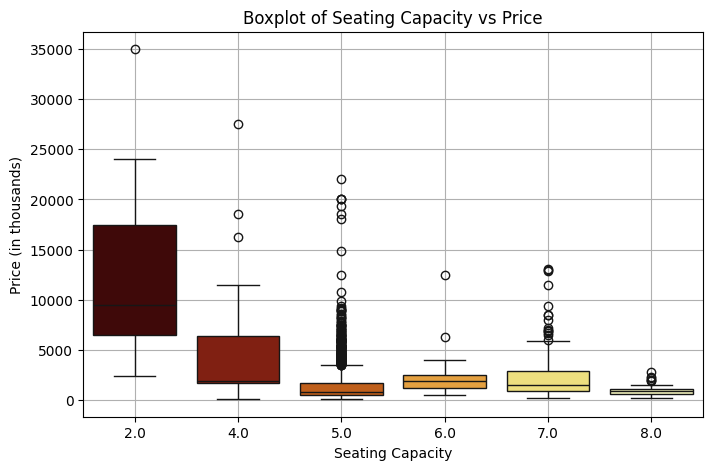

In [172]:
# Análisis de Seating Capacity
print(data_["Seating Capacity"].value_counts(normalize=True).apply(lambda x: x*100).round(2))
#plot the Seating Capacity variable
plt.figure(figsize=(8,5))
sns.countplot(data=data_, x="Seating Capacity", hue="Seating Capacity", palette="afmhot")
plt.title("Distribution of Seating Capacity")
plt.xlabel("Seating Capacity")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.grid()
plt.show()

#boxplot of Seating Capacity vs Price
plt.figure(figsize=(8,5))
sns.boxplot(data=data_, x="Seating Capacity", y="Price", palette="afmhot")
plt.title("Boxplot of Seating Capacity vs Price")
plt.xlabel("Seating Capacity")
plt.ylabel("Price (in thousands)")
plt.grid()
plt.show()

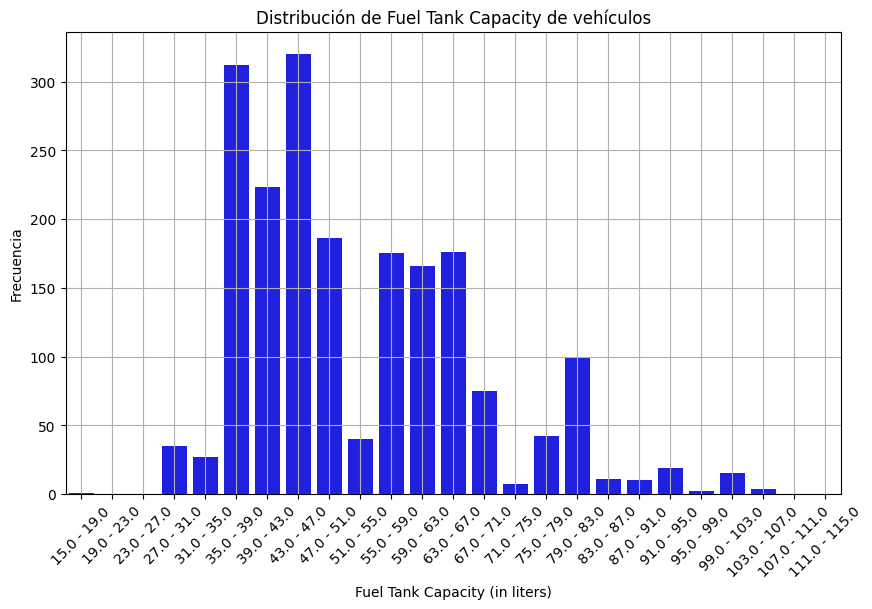

In [179]:
#Análisis univariado de los Fuel Tank Capacity
k = 1 + 3.322 * np.log(data_["Fuel Tank Capacity"].size)
k = k.astype(int)

max_data = data_["Fuel Tank Capacity"].max()
min_data = data_["Fuel Tank Capacity"].min()

j = int((max_data/k))

intervalos = [min_data+i*j for i in range(0, k)]
conteo,_ = np.histogram(data_["Fuel Tank Capacity"].values, bins=intervalos)

#Creación de la tabla de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Intervalo': [f"{intervalos[i]} - {intervalos[i+1]}" for i in range(len(intervalos)-1)],
    'Frecuencia': conteo
})

tabla_frecuencias['Frecuencia Acumulada'] = tabla_frecuencias['Frecuencia'].cumsum()
tabla_frecuencias['Frecuencia Relativa'] = tabla_frecuencias['Frecuencia'] / tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa Acumulada'] = tabla_frecuencias['Frecuencia Relativa'].cumsum()
tabla_frecuencias['Frecuencia Relativa Porcentual %'] = tabla_frecuencias['Frecuencia Relativa'] * 100
tabla_frecuencias['Frecuencia Relativa Porcentual Acumulada %'] = tabla_frecuencias['Frecuencia Relativa Acumulada'] * 100

#barplot the Fuel Tank Capacity variable
plt.figure(figsize=(10,6))
sns.barplot(x='Intervalo', y='Frecuencia', data=tabla_frecuencias, color='blue')
plt.title("Distribución de Fuel Tank Capacity de vehículos")
plt.xlabel("Fuel Tank Capacity (in liters)")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid()
plt.show()

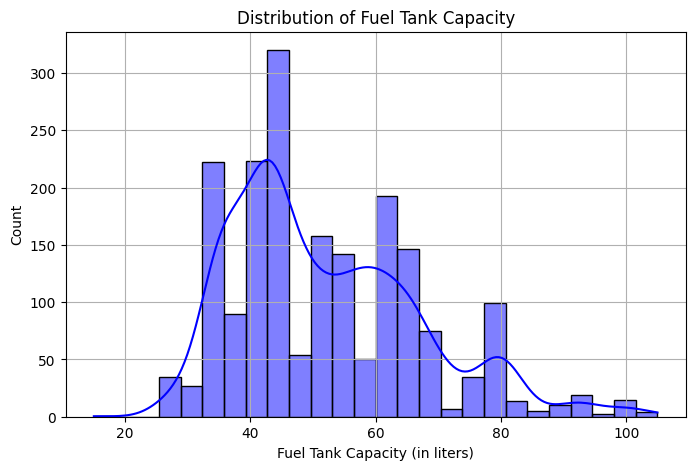

C:\Users\57317\AppData\Local\Temp\ipykernel_13164\441565474.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_, x="Fuel Tank Capacity", palette="afmhot")


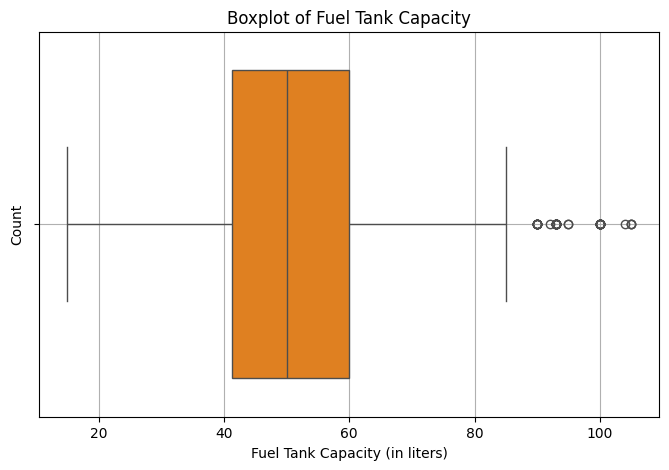

In [180]:
#histplot of Fuel Tank Capacity
plt.figure(figsize=(8,5))
sns.histplot(data=data_, x="Fuel Tank Capacity", bins=k, kde=True, color='blue')
plt.title("Distribution of Fuel Tank Capacity")
plt.xlabel("Fuel Tank Capacity (in liters)")
plt.ylabel("Count")
plt.grid()
plt.show()

#boxplot of tabla_frecuencias
plt.figure(figsize=(8,5))
sns.boxplot(data=data_, x="Fuel Tank Capacity", palette="afmhot")
plt.title("Boxplot of Fuel Tank Capacity")
plt.xlabel("Fuel Tank Capacity (in liters)")
plt.ylabel("Count")
plt.grid()
plt.show()




##### **5.2.4 Análisis univariado de Make**

Make
Maruti Suzuki    21.37
Hyundai          16.95
Mercedes-Benz     8.31
Honda             7.67
Toyota            6.41
Audi              6.17
BMW               5.88
Mahindra          5.78
Tata              2.77
Volkswagen        2.43
Name: proportion, dtype: float64


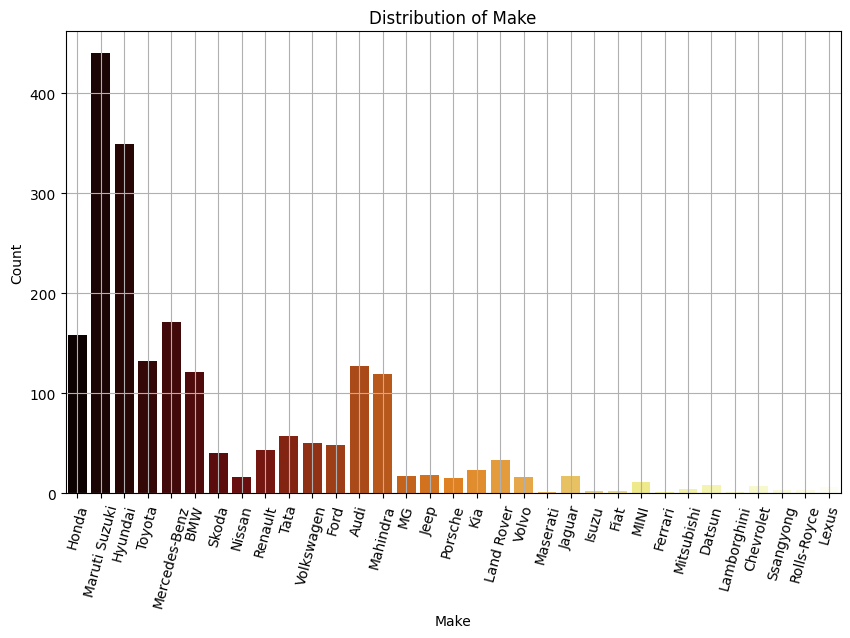

C:\Users\57317\AppData\Local\Temp\ipykernel_13164\3203303814.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_, x="Make", y="Price", palette="afmhot")


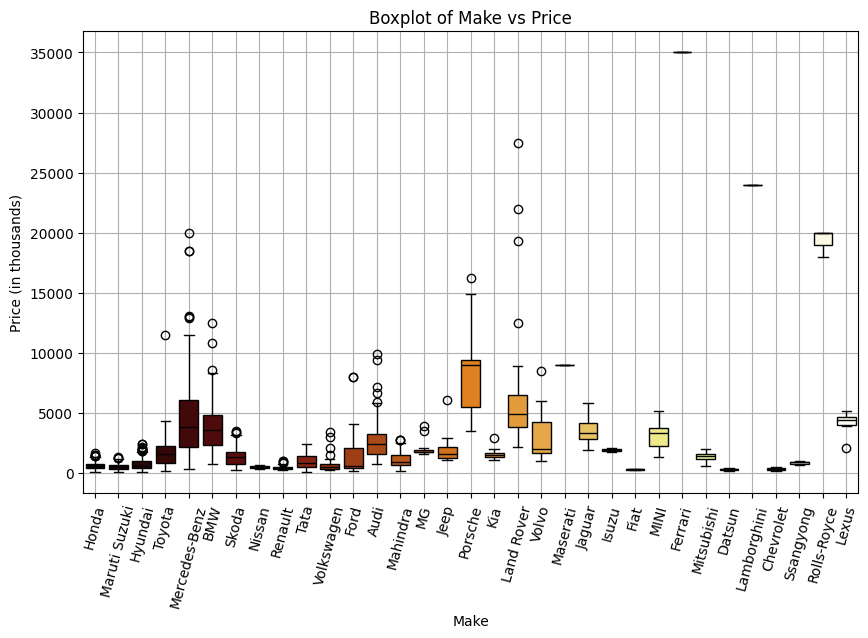

In [202]:
#Análisis univariado de Make
print(data_["Make"].value_counts(normalize=True).apply(lambda x: x*100).round(2).head(10))

#barplot the Make variable
plt.figure(figsize=(10,6))
sns.countplot(data=data_, x="Make", hue="Make", palette="afmhot")
plt.title("Distribution of Make")
plt.xlabel("Make")
plt.xticks(rotation=75)
plt.ylabel("Count")
plt.grid()
plt.show()

#Boxplot of Make vs Price
plt.figure(figsize=(10,6))
sns.boxplot(data=data_, x="Make", y="Price", palette="afmhot")
plt.title("Boxplot of Make vs Price")
plt.xlabel("Make")
plt.xticks(rotation=75)
plt.ylabel("Price (in thousands)")
plt.grid()
plt.show()

##### **5.2.5 Análisis univariado de Fuel Type**

Fuel Type       Diesel      Petrol       CNG  Electric       LPG    Hybrid  \
count         2.000000    2.000000   2.00000  2.000000  2.000000  2.000000   
mean        549.975000  493.875000  26.21500  3.670000  2.620000  1.575000   
std         705.727923  633.744453  33.63707  4.709331  3.365828  2.015254   
min          50.950000   45.750000   2.43000  0.340000  0.240000  0.150000   
25%         300.462500  269.812500  14.32250  2.005000  1.430000  0.862500   
50%         549.975000  493.875000  26.21500  3.670000  2.620000  1.575000   
75%         799.487500  717.937500  38.10750  5.335000  3.810000  2.287500   
max        1049.000000  942.000000  50.00000  7.000000  5.000000  3.000000   

Fuel Type  CNG + CNG  Petrol + CNG  Petrol + LPG  
count       2.000000      2.000000      2.000000  
mean        0.525000      0.525000      0.525000  
std         0.671751      0.671751      0.671751  
min         0.050000      0.050000      0.050000  
25%         0.287500      0.287500      0.

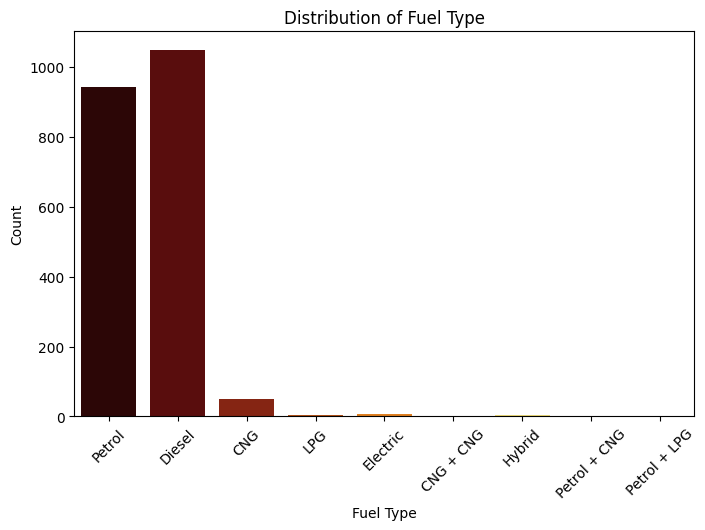

C:\Users\57317\AppData\Local\Temp\ipykernel_13164\4021489400.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_, x="Fuel Type", y="Price", palette="afmhot")


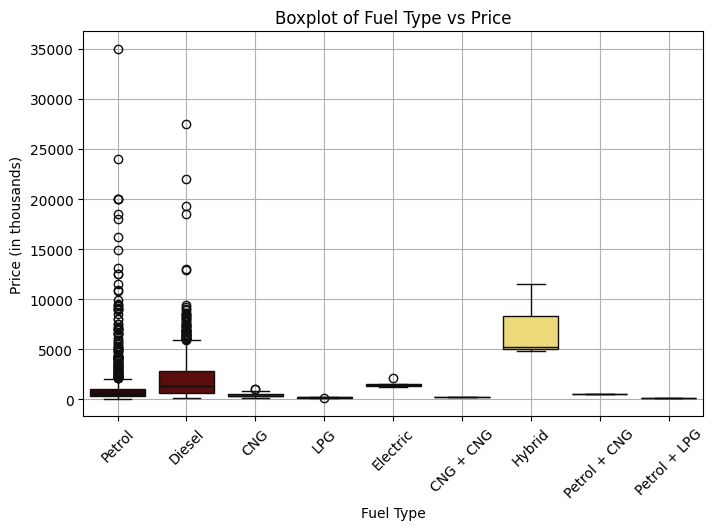

In [ ]:
#Análisis univariado de Fuel Type
aux_ = data_["Fuel Type"].value_counts()
aux = data_["Fuel Type"].value_counts(normalize=True).apply(lambda x: x*100).round(2)
df = pd.DataFrame({'Count': aux_, 'Percentage (%)': aux})
print(df.describe())

#barplot the Fuel Type variable
plt.figure(figsize=(8,5))
sns.countplot(data=data_, x="Fuel Type", hue="Fuel Type", palette="afmhot")
plt.title("Distribution of Fuel Type")
plt.xlabel("Fuel Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


#boxplot of Fuel Type vs Price
plt.figure(figsize=(8,5))
sns.boxplot(data=data_, x="Fuel Type", y="Price", palette="afmhot")
plt.title("Boxplot of Fuel Type vs Price")
plt.xlabel("Fuel Type")
plt.xticks(rotation=45)
plt.ylabel("Price (in thousands)")
plt.grid()
plt.show()

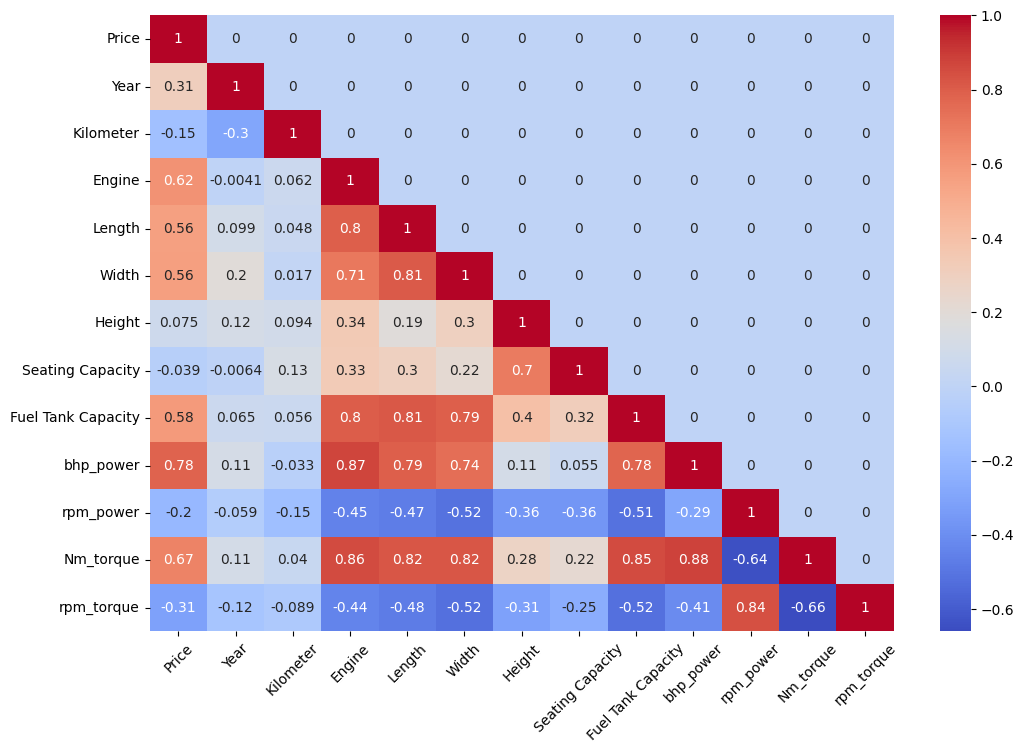

In [233]:
columnas_numericas = data_.select_dtypes(include=['int', 'float']).columns

#Create a heatmap of the correlation matrixplt.figure(figsize=(12,8))
plt.figure(figsize=(12,8))
corr_ = data_[columnas_numericas].corr(method='pearson')
triangular_df = pd.DataFrame(np.triu(corr_).T, index=corr_.index, columns=corr_.columns)

sns.heatmap(triangular_df, annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()

In [249]:
#Finding missing data
missing_data = data_.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

Drivetrain            500
Fuel Tank Capacity    420
rpm_power             323
Engine                308
Max Power             308
rpm_torque            308
Max Torque            308
bhp_power             308
Nm_torque             308
Length                248
Seating Capacity      248
Width                 248
Height                248
dtype: int64


In [269]:
#Imputando missing values with Iterative Imputer using Bayessian regression for numerical columns and mode for categorical columns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.linear_model import BayesianRidge


df_missing_data = pd.DataFrame(missing_data, columns=['Missing Values'])
impute_cols = df_missing_data.index.tolist()

for col in impute_cols:
    data_.loc[data_.sample(n=data_[col].isnull().sum(), random_state=42).index, col] = np.nan


impute_cols_num = data_[impute_cols].select_dtypes(include=np.number).columns.tolist()
impute_cols_cat = data_[impute_cols].select_dtypes(include='object').columns.tolist()

# Make a copy to preserve the original DataFrame
data_imputed = data_.copy()

# Impute numerical columns with IterativeImputer
if impute_cols_num:
    imputer_num = IterativeImputer(
        estimator=BayesianRidge(),
        max_iter=10,
        random_state=0
    )
    data_imputed[impute_cols_num] = imputer_num.fit_transform(data_imputed[impute_cols_num])

# Impute categorical columns with SimpleImputer (mode)
if impute_cols_cat:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    data_imputed[impute_cols_cat] = imputer_cat.fit_transform(data_imputed[impute_cols_cat])


missing_data_after = data_imputed.isnull().sum()
missing_data_after = missing_data_after[missing_data_after > 0].sort_values(ascending=False)
print("Valores nulos en el DataFrame original:")
if missing_data.empty:
    print("No hay valores nulos en el DataFrame original.")
else:
    print(missing_data)

print("-----------------------------------")
print("Valores nulos después de la imputación:")
if missing_data_after.empty:
    print("No hay valores nulos después de la imputación.")
else:
    print(missing_data_after)

Valores nulos en el DataFrame original:
Drivetrain            500
Fuel Tank Capacity    420
rpm_power             323
Engine                308
Max Power             308
rpm_torque            308
Max Torque            308
bhp_power             308
Nm_torque             308
Length                248
Seating Capacity      248
Width                 248
Height                248
dtype: int64
-----------------------------------
Valores nulos después de la imputación:
No hay valores nulos después de la imputación.


c:\Users\57317\Documents\emmaquantum\Datascience\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [290]:
#Transform Numerical variables in logarithmic scale
data_log = data_imputed.copy()
columnas_numericas = data_log.select_dtypes(include=['int', 'float']).columns
data_log[columnas_numericas] = data_[columnas_numericas].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)
data_log.describe()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,bhp_power,rpm_power,Nm_torque,rpm_torque
count,2059.000000,2059.000000,2059.000000,1679.000000,1753.000000,1753.000000,1753.000000,1753.000000,1550.000000,1679.000000,1662.000000,1679.000000,1679.000000
mean,6.902825,7.609576,3.759771,7.374128,8.357267,7.475185,7.370340,1.834078,3.932450,4.768477,8.456606,5.344467,7.769667
std,0.979757,0.001668,0.782734,0.346010,0.104902,0.076766,0.083503,0.123233,0.278816,0.442907,0.229059,0.583289,0.447374
min,3.912023,7.595387,0.000000,6.437752,8.039157,7.297091,7.061334,1.098612,2.772589,3.583519,7.976252,3.891820,7.090910
25%,6.186207,7.608374,3.401197,7.088409,8.290544,7.436028,7.303843,1.791759,3.713572,4.430817,8.294300,4.753590,7.378384
50%,6.716595,7.609862,3.931826,7.312553,8.382747,7.482119,7.346655,1.791759,3.931826,4.762174,8.343078,5.303305,7.550135
75%,7.563201,7.610853,4.290459,7.598900,8.440528,7.513709,7.424762,1.791759,4.110874,5.147494,8.699681,5.860786,8.294300
max,10.463132,7.612337,7.601402,8.793764,8.625150,7.705713,7.598900,2.197225,4.663439,6.493754,9.018090,6.660575,8.779711


In [291]:
# Suponiendo que 'data_' es tu DataFrame
# y que ya has definido categorical_cols con .select_dtypes
categorical_cols = data_.select_dtypes(include='object').columns.tolist()

# Lista de columnas que quieres excluir
cols_to_remove = ["Model", "Max Power", "Max Torque"]

# Usar una comprensión de lista para crear una nueva lista sin las columnas a remover
categorical_cols = [col for col in categorical_cols if col not in cols_to_remove]


# Aplica la codificación One-Hot a las columnas seleccionadas
data_final = pd.get_dummies(data_log, columns=categorical_cols, dtype=int)
data_final.drop(columns=cols_to_remove, inplace=True)
data_final.head()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,bhp_power,...,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Commercial Registration,Seller Type_Corporate,Seller Type_Individual,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD
0,6.226537,7.609862,4.479040,7.089243,8.291797,7.427144,7.317212,1.791759,3.583519,4.477337,...,0,0,0,0,0,1,0,0,1,0
1,6.111467,7.608374,4.330733,7.130099,8.293049,7.436028,7.349874,1.791759,3.761200,4.317488,...,0,1,0,0,0,0,1,0,1,0
2,5.398163,7.606885,4.219508,7.088409,8.184793,7.375256,7.346655,1.791759,3.583519,4.382027,...,0,0,0,0,0,0,1,0,1,0
3,6.684612,7.610853,3.650658,7.088409,8.293049,7.465083,7.320527,1.791759,3.637586,4.418841,...,0,0,0,0,0,0,1,0,1,0
4,7.576097,7.610358,4.248495,7.780721,8.462948,7.512618,7.493317,2.079442,4.025352,5.003946,...,0,0,0,0,0,0,1,0,0,1


## **6. Análisis Bivariado**

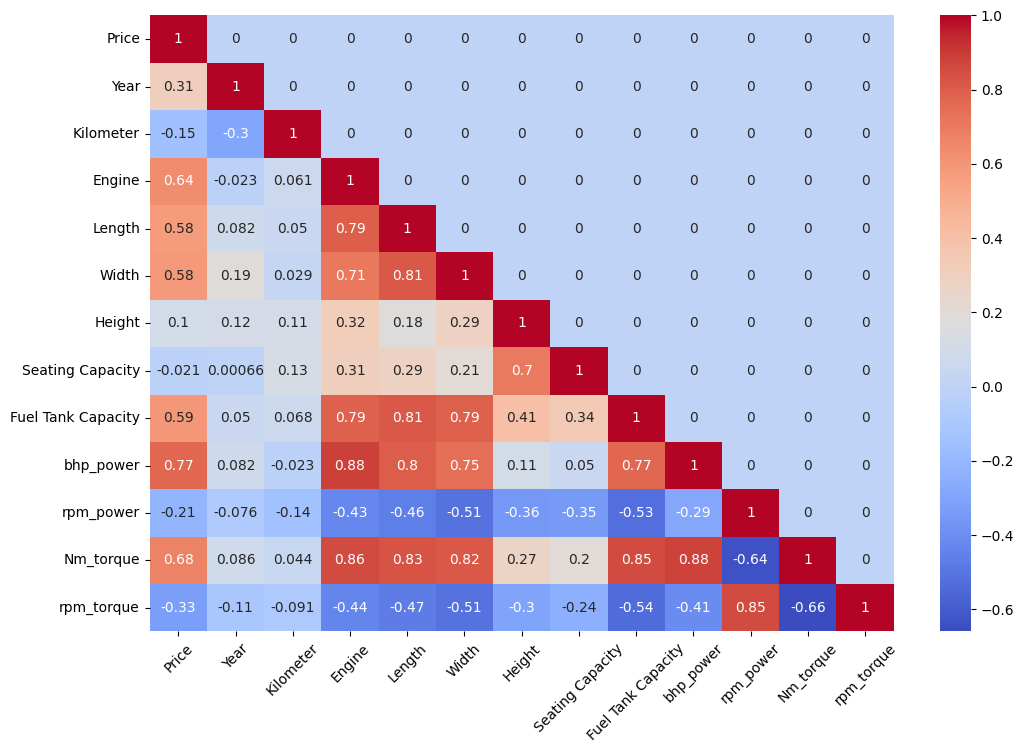

In [331]:
columnas_numericas = data_.select_dtypes(include=['int', 'float']).columns

#Create a heatmap of the correlation matrixplt.figure(figsize=(12,8))
plt.figure(figsize=(12,8))
corr_ = data_[columnas_numericas].corr(method='pearson')
triangular_df = pd.DataFrame(np.triu(corr_).T, index=corr_.index, columns=corr_.columns)

sns.heatmap(triangular_df, annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()

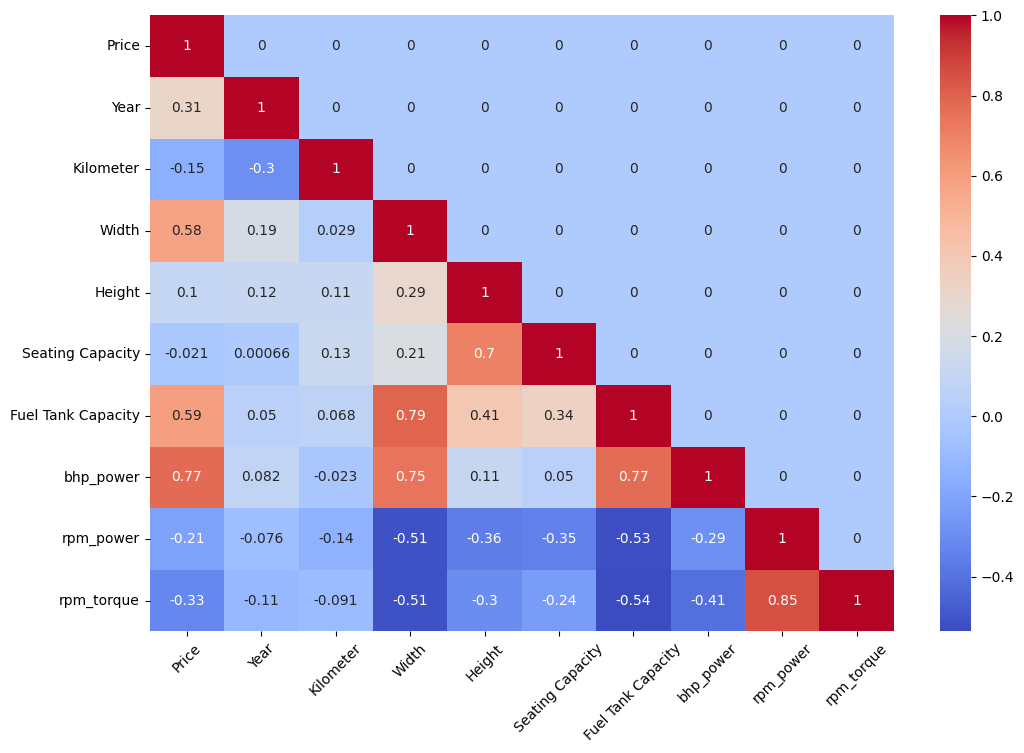

In [335]:
#   Eliminar variables para evitar confusión en el modelo.

#1. bhp_power y engine (alta correlación 0.88), ¿Cuál eliminar? Pues la que tiene menos correlación con Price, que es Engine (0.64 Engine vs 0.77 bhp_power)
try:
    data_.drop(columns=["Engine"], inplace=True)
except KeyError:
    print("La columna 'Engine' no existe en el DataFrame.")

#2. Fuel Tnak y Lenght (alta correlación 0.82), ¿Cuál eliminar? Pues la que tiene menos correlación con Price, que es Lenght (0.59 Fuel Tank vs 0.58 Lenght)
try:
    data_.drop(columns=["Length"], inplace=True)
except KeyError:
    print("La columna 'Length' no existe en el DataFrame.")

#3. Nm_toque y bhp_power (alta correlación 0.88), ¿Cuál eliminar? Pues la que tiene menos correlación con Price, que es Nm_toque (0.77 bhp_power vs 0.68 Nm_toque)
try:
    data_.drop(columns=["Nm_torque"], inplace=True)
except KeyError:
    print("La columna 'Length' no existe en el DataFrame.")

#New heatmap without the dropped variables
columnas_numericas = data_.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=(12,8))
corr_ = data_[columnas_numericas].corr(method='pearson')
triangular_df = pd.DataFrame(np.triu(corr_).T, index=corr_.index, columns=corr_.columns)
sns.heatmap(triangular_df, annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()


## **7 Data cleaning**

##### **7.1.1 Missed data**

In [336]:
#Finding missing data
missing_data = data_.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

Drivetrain            876
Fuel Tank Capacity    753
rpm_power             601
Max Power             573
Max Torque            573
bhp_power             573
rpm_torque            573
Seating Capacity      468
Width                 468
Height                468
dtype: int64


##### **7.1.2 Imputing missed data**

La imputación de datos se realizó dos métodos:

1. Para variables númericas se usó el método de Iteravite Imputer usando un estimador Bayesian Ridge. Se usó este método debido a la creencia de linealidad en algunas variables, esto podría proporcionar relación suficiente para la imputación de los datos usando un método lineal.
2. Para variables categóricas, se usó el método de Simpler Imputer, usando la estrategia de la más frecuente, debido a que no tenemos más información para este evento.

In [337]:
#Imputando missing values with Iterative Imputer using Bayessian regression for numerical columns and mode for categorical columns
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.linear_model import BayesianRidge


df_missing_data = pd.DataFrame(missing_data, columns=['Missing Values'])
impute_cols = df_missing_data.index.tolist()

for col in impute_cols:
    data_.loc[data_.sample(n=data_[col].isnull().sum(), random_state=42).index, col] = np.nan


impute_cols_num = data_[impute_cols].select_dtypes(include=np.number).columns.tolist()
impute_cols_cat = data_[impute_cols].select_dtypes(include='object').columns.tolist()

# Make a copy to preserve the original DataFrame
data_imputed = data_.copy()

# Impute numerical columns with IterativeImputer
if impute_cols_num:
    imputer_num = IterativeImputer(
        estimator=BayesianRidge(),
        max_iter=10,
        random_state=0
    )
    data_imputed[impute_cols_num] = imputer_num.fit_transform(data_imputed[impute_cols_num])

# Impute categorical columns with SimpleImputer (mode)
if impute_cols_cat:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    data_imputed[impute_cols_cat] = imputer_cat.fit_transform(data_imputed[impute_cols_cat])


missing_data_after = data_imputed.isnull().sum()
missing_data_after = missing_data_after[missing_data_after > 0].sort_values(ascending=False)
print("Valores nulos en el DataFrame original:")
if missing_data.empty:
    print("No hay valores nulos en el DataFrame original.")
else:
    print(missing_data)

print("-----------------------------------")
print("Valores nulos después de la imputación:")
if missing_data_after.empty:
    print("No hay valores nulos después de la imputación.")
else:
    print(missing_data_after)

Valores nulos en el DataFrame original:
Drivetrain            876
Fuel Tank Capacity    753
rpm_power             601
Max Power             573
Max Torque            573
bhp_power             573
rpm_torque            573
Seating Capacity      468
Width                 468
Height                468
dtype: int64
-----------------------------------
Valores nulos después de la imputación:
No hay valores nulos después de la imputación.


c:\Users\57317\Documents\emmaquantum\Datascience\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


##### **7.1.3 Outliers Data**

In [338]:
#Transform Numerical variables in logarithmic scale
data_log = data_imputed.copy()
columnas_numericas = data_log.select_dtypes(include=['int', 'float']).columns
data_log[columnas_numericas] = data_imputed[columnas_numericas].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)
data_log.describe()

,Price,Year,Kilometer,Width,Height,Seating Capacity,Fuel Tank Capacity,bhp_power,rpm_power,rpm_torque
count,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000
mean,6.902825,7.609576,3.759771,7.474920,7.370169,1.836023,3.952413,4.792231,8.466955,7.806841
std,0.979757,0.001668,0.782734,0.066421,0.071788,0.103172,0.236636,0.395474,0.192517,0.382290
min,3.912023,7.595387,0.000000,7.297091,7.061334,1.098612,2.772589,2.516056,7.976252,6.694496
25%,6.186207,7.608374,3.401197,7.438972,7.313887,1.791759,3.784190,4.499810,8.294300,7.467942
50%,6.716595,7.609862,3.931826,7.477124,7.372794,1.791759,3.980538,4.871006,8.485323,7.879662
75%,7.563201,7.610853,4.290459,7.506042,7.400010,1.841580,4.073722,4.957328,8.630700,8.160804
max,10.463132,7.612337,7.601402,7.705713,7.598900,2.197225,4.663439,6.401917,9.018090,8.779711


In [339]:
categorical_cols = data_log.select_dtypes(include='object').columns.tolist()

# Lista de columnas que quieres excluir
cols_to_remove = ["Model", "Max Power", "Max Torque"]

# Usar una comprensión de lista para crear una nueva lista sin las columnas a remover
categorical_cols = [col for col in categorical_cols if col not in cols_to_remove]

# Aplica la codificación One-Hot a las columnas seleccionadas
data_final = pd.get_dummies(data_log, columns=categorical_cols, dtype=int)
data_final.drop(columns=cols_to_remove, inplace=True)
data_final.head()

,Price,Year,Kilometer,Width,Height,Seating Capacity,Fuel Tank Capacity,bhp_power,rpm_power,rpm_torque,...,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Commercial Registration,Seller Type_Corporate,Seller Type_Individual,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD
0,6.226537,7.609862,4.479040,7.427144,7.317212,1.791759,3.583519,4.477337,8.699681,8.412055,...,0,0,0,0,0,1,0,0,1,0
1,6.111467,7.608374,4.330733,7.436028,7.349874,1.791759,3.761200,4.317488,8.294300,7.601402,...,0,1,0,0,0,0,1,0,1,0
2,5.398163,7.606885,4.219508,7.375256,7.346655,1.791759,3.647334,4.226416,8.625557,8.141820,...,0,0,0,0,0,0,1,0,1,0
3,6.684612,7.610853,3.650658,7.465083,7.320527,1.791759,3.637586,4.418841,8.699681,8.343078,...,0,0,0,0,0,0,1,0,1,0
4,7.576097,7.610358,4.248495,7.512618,7.493317,2.079442,4.025352,5.003946,8.131825,7.244942,...,0,0,0,0,0,0,1,0,0,1


In [340]:
#Data missing data_final
missing_data_final = data_final.isnull().sum()
missing_data_final = missing_data_final[missing_data_final > 0].sort_values(ascending=False)
print("Valores nulos en el DataFrame final:")
if missing_data_final.empty:
    print("No hay valores nulos en el DataFrame final.")
else:
    print(missing_data_final)

Valores nulos en el DataFrame final:
No hay valores nulos en el DataFrame final.


## **8 PCA Analysis**

In [341]:
#PCA análisis de componentes principales
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_final)
# Aplicar PCA
pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
data_pca = pca.fit_transform(data_scaled)
print(f"Número de componentes principales seleccionados: {pca.n_components_}")
# Crear un DataFrame con los componentes principales
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
data_pca_df.head()

Número de componentes principales seleccionados: 133


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133
0,-3.326357,-2.262966,0.153564,-7.452598,0.174927,0.157764,0.188941,-0.306072,0.582456,0.534184,...,-0.484759,-0.978136,0.129818,-0.795084,0.102508,-0.707053,0.222595,0.217998,0.225849,-0.968007
1,-1.002201,3.048195,-1.701489,0.277297,-1.601394,-1.688119,-0.008403,1.176114,0.423296,0.869031,...,-0.050694,0.159198,-0.132188,0.510712,0.374111,0.330108,0.535690,0.039124,-0.293600,0.128179
2,-3.987036,0.924574,-0.210769,-0.608198,0.238039,1.206344,-0.834839,-0.303888,0.914962,-0.021924,...,-1.085658,-0.050301,0.521538,-0.516169,-0.598432,-0.254864,-0.141795,1.503050,-0.188716,1.023864
3,-2.943113,-1.045006,1.183605,0.307353,1.536448,1.234348,-0.680493,-0.896511,0.067457,0.610781,...,-1.739895,-0.130686,-1.175972,-0.570923,0.687555,-1.031641,0.653640,0.917760,-0.012513,-0.093534
4,3.030030,2.742151,1.891122,-1.040202,2.360920,0.535169,-0.622954,-0.293092,-1.488621,-0.126696,...,-0.203536,0.141220,0.453305,0.417961,-0.527730,0.497474,-0.507814,0.815929,-0.065985,-0.474805


Esto sugiere que no hay reducción de dimensionalidad, no vale la pena perder 5% de información por un resultado tan alto en un intento de reducción, me quedo con el original.

## 9. **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Split the data into training and testing sets
y = data_final['Price']
X = data_final.drop('Price', axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **9.1 Linear Regression**

In [396]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Inicializar y entrenar el modelo de Regresión Lineal
linear_model = LinearRegression()

scores_lineal = cross_val_score(linear_model, X, y, cv=5, scoring='r2', n_jobs=-1)

# Imprimir los resultados
print("Resultados de la validación cruzada (R² por fold):", scores_lineal.max())
print(f"R² promedio (general): {scores_lineal.mean():.4f}")
print(f"Desviación estándar de R²: {scores_lineal.std():.4f}")

Resultados de la validación cruzada (R² por fold): 0.924606427411099
R² promedio (general): 0.8991
Desviación estándar de R²: 0.0191


### **9.2 Lasso Regresor**

In [386]:
from sklearn.linear_model import LassoCV

# Inicializar y entrenar el modelo de Lasso con validación cruzada
# cv=5 significa que probará 5 divisiones del conjunto de datos
lassocv_model = LassoCV(
    alphas=np.logspace(-4, -1, 10), # Rango de alfas a probar
    cv=5,
    random_state=42
)

lassocv_model.fit(X_train, y_train)

# El mejor valor de alpha se almacena en el atributo 'alpha_'
best_alpha = lassocv_model.alpha_

# Hacer predicciones con el mejor modelo
y_pred_lassocv = lassocv_model.predict(X_test)

# Evaluar el modelo
mse_lassocv = mean_squared_error(y_test, y_pred_lassocv)
rmse_lassocv = np.sqrt(mse_lassocv)
r2_lassocv = r2_score(y_test, y_pred_lassocv)

print("### Evaluación de Lasso Regression con Validación Cruzada ###")
print(f"Mejor valor de alpha encontrado: {best_alpha:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse_lassocv:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_lassocv:.2f}")
print(f"R-cuadrado (R²): {r2_lassocv:.2f}")

### Evaluación de Lasso Regression con Validación Cruzada ###
Mejor valor de alpha encontrado: 0.0001
Error Cuadrático Medio (MSE): 0.24
Raíz del Error Cuadrático Medio (RMSE): 0.49
R-cuadrado (R²): 0.75


In [398]:
#Lasso Regresor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Inicializar y entrenar el modelo de Lasso
lasso_model = Lasso(alpha=0.0001)

scores_lasso = cross_val_score(lasso_model, X, y, cv=5, scoring='r2', n_jobs=-1)

# Imprimir los resultados
print("Resultados de la validación cruzada (R² por fold):", scores_lasso.max())
print(f"R² promedio (general): {scores_lasso.mean():.4f}")
print(f"Desviación estándar de R²: {scores_lasso.std():.4f}")

Resultados de la validación cruzada (R² por fold): 0.9130452459770201
R² promedio (general): 0.8927
Desviación estándar de R²: 0.0130


### **9.3 Regresión Ridge**

In [387]:
from sklearn.linear_model import RidgeCV

# Initialize RidgeCV with a range of alpha values to test
# np.logspace creates a logarithmically spaced array from 10^-3 to 10^2
ridgecv_model = RidgeCV(
    alphas=np.logspace(-3, 2, 10),
    cv=5  # Use 5-fold cross-validation
)

# Train the model
ridgecv_model.fit(X_train, y_train)

# The best alpha value is stored in the 'alpha_' attribute
best_alpha = ridgecv_model.alpha_

# Make predictions on the test set using the model with the best alpha
y_pred_ridgecv = ridgecv_model.predict(X_test)

# Evaluate the model
mse_ridgecv = mean_squared_error(y_test, y_pred_ridgecv)
rmse_ridgecv = np.sqrt(mse_ridgecv)
r2_ridgecv = r2_score(y_test, y_pred_ridgecv)

print("### Evaluación de Ridge Regression con Validación Cruzada ###")
print(f"Mejor valor de alpha encontrado: {best_alpha:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse_ridgecv:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_ridgecv:.2f}")
print(f"R-cuadrado (R²): {r2_ridgecv:.2f}")

### Evaluación de Ridge Regression con Validación Cruzada ###
Mejor valor de alpha encontrado: 0.0010
Error Cuadrático Medio (MSE): 0.23
Raíz del Error Cuadrático Medio (RMSE): 0.48
R-cuadrado (R²): 0.76


In [399]:
#Ridge Regressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Inicializar y entrenar el modelo de Ridge
ridge_model = Ridge(alpha=0.001)
scores_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='r2', n_jobs=-1)

# Imprimir los resultados
print("Resultados de la validación cruzada (R² por fold):", scores_ridge.max())
print(f"R² promedio (general): {scores_ridge.mean():.4f}")
print(f"Desviación estándar de R²: {scores_ridge.std():.4f}")

Resultados de la validación cruzada (R² por fold): 0.9139607047976972
R² promedio (general): 0.8930
Desviación estándar de R²: 0.0131


### **9.4 Random Forest Regression**

In [388]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros que se van a probar
# En este caso, solo probaremos n_estimators
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400]
}

# Crear el modelo de Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Crear el objeto de búsqueda en cuadrícula
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # Usar 5-fold cross-validation
    scoring='r2', # Elige la métrica que quieras optimizar
    n_jobs=-1  # Usar todos los procesadores para acelerar el proceso
)

# Ejecutar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor score de R²: {grid_search.best_score_:.4f}")

Mejores parámetros encontrados: {'n_estimators': 300}
Mejor score de R²: 0.9078


In [402]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Inicializar y entrenar el modelo de Random Forest with Validación cruzada
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)

scores_forest = cross_val_score(rf_model, X, y, cv=5, scoring='r2', n_jobs=-1)

# Imprimir los resultados
print("Resultados de la validación cruzada (R² por fold):", scores_forest.max())
print(f"R² promedio (general): {scores_forest.mean():.4f}")
print(f"Desviación estándar de R²: {scores_forest.std():.4f}")

Resultados de la validación cruzada (R² por fold): 0.920864259155448
R² promedio (general): 0.9072
Desviación estándar de R²: 0.0127


### **9.5 Gradient Boosting Regressor**

In [401]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Inicializa el modelo de Gradient Boosting
gbr_model = GradientBoostingRegressor(random_state=42)

# Crea el objeto de búsqueda en cuadrícula
grid_search = GridSearchCV(
    estimator=gbr_model,
    param_grid=param_grid,
    cv=5,  # Usar 5-fold cross-validation
    scoring='r2',
    n_jobs=-1  # Usar todos los procesadores
)

# Ejecuta la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtiene los mejores parámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("### Resultados de la optimización ###")
print(f"Mejores parámetros: {best_params}")
print(f"Mejor R² (promedio de validación cruzada): {best_score:.4f}")

### Resultados de la optimización ###
Mejores parámetros: {'learning_rate': 0.1, 'n_estimators': 400}
Mejor R² (promedio de validación cruzada): 0.9342


In [403]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Inicializar y entrenar el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, random_state=42)

scores_gb = cross_val_score(gb_model, X, y, cv=5, scoring='r2', n_jobs=-1)

# Imprimir los resultados
print("Resultados de la validación cruzada (R² por fold):", scores_gb.max())
print(f"R² promedio (general): {scores_gb.mean():.4f}")
print(f"Desviación estándar de R²: {scores_gb.std():.4f}")

Resultados de la validación cruzada (R² por fold): 0.9436156903033288
R² promedio (general): 0.9218
Desviación estándar de R²: 0.0157


### **9.6  Support Vector Regressor (SVR)**

In [404]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# 2. Definir los parámetros que se van a probar
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale'],
    'epsilon': [0.01, 0.1, 0.2]
}

# 3. Crear el modelo SVR
svr_model = SVR(kernel='rbf')

# 4. Crear el objeto de búsqueda en cuadrícula
grid_search = GridSearchCV(
    estimator=svr_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2', # Puedes usar 'neg_mean_squared_error' si prefieres
    n_jobs=-1
)

# 5. Ejecutar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# 6. Obtener los mejores parámetros
print("### Resultados de la optimización SVR ###")
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor R² (promedio de validación cruzada): {grid_search.best_score_:.4f}")


### Resultados de la optimización SVR ###
Mejores parámetros: {'C': 100, 'epsilon': 0.2, 'gamma': 0.01}
Mejor R² (promedio de validación cruzada): 0.8561


In [405]:
#Support Vector Regressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Inicializar y entrenar el modelo de Support Vector Regressor
svr_model = SVR(kernel='rbf', C=100, gamma=0.2, epsilon=.01)

scores_svr = cross_val_score(svr_model, X, y, cv=5, scoring='r2', n_jobs=-1)

# Imprimir los resultados
print("Resultados de la validación cruzada (R² por fold):", scores_svr.max())
print(f"R² promedio (general): {scores_svr.mean():.4f}")
print(f"Desviación estándar de R²: {scores_svr.std():.4f}")

Resultados de la validación cruzada (R² por fold): 0.7992680401543607
R² promedio (general): 0.7776
Desviación estándar de R²: 0.0115


### **9.8  K-Nearest Neighbors (KNN) Regressor**

In [406]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# 1. Definir los parámetros que se van a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 2. Crear el modelo KNeighborsRegressor
knn_model = KNeighborsRegressor()

# 3. Crear el objeto de búsqueda en cuadrícula
grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    cv=5,  # Usar 5-fold cross-validation
    scoring='r2', # Elige la métrica que quieras optimizar
    n_jobs=-1  # Usar todos los procesadores para acelerar el proceso
)

# 4. Ejecutar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# 5. Obtener los mejores parámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("### Resultados de la optimización ###")
print(f"Mejores parámetros encontrados: {best_params}")
print(f"Mejor score de R²: {best_score:.4f}")

### Resultados de la optimización ###
Mejores parámetros encontrados: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Mejor score de R²: 0.7771


In [407]:
#K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
# Inicializar y entrenar el modelo de K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=9, metric='manhattan')

scores_knn = cross_val_score(svr_model, X, y, cv=5, scoring='r2', n_jobs=-1)

# Imprimir los resultados
print("Resultados de la validación cruzada (R² por fold):", scores_knn.max())
print(f"R² promedio (general): {scores_knn.mean():.4f}")
print(f"Desviación estándar de R²: {scores_knn.std():.4f}")

Resultados de la validación cruzada (R² por fold): 0.7992680401543607
R² promedio (general): 0.7776
Desviación estándar de R²: 0.0115


## **9.10 EVALUCIÓN DE MODELOS**

In [409]:
# Crear un DataFrame con los diferentes R² obtenidos de los métodos guardados en scores
resultados_r2 = pd.DataFrame({
    'Modelo': [
        'Linear Regression',
        'Lasso',
        'Ridge',
        'Random Forest',
        'Gradient Boosting',
        'SVR',
        'KNN'
    ],
    'R2 promedio': [
        scores_lineal.mean(),
        scores_lasso.mean(),
        scores_ridge.mean(),
        scores_forest.mean(),
        scores_gb.mean(),
        scores_svr.mean(),
        scores_knn.mean()
    ],
    'R2 std': [
        scores_lineal.std(),
        scores_lasso.std(),
        scores_ridge.std(),
        scores_forest.std(),
        scores_gb.std(),
        scores_svr.std(),
        scores_knn.std()
    ]
})

print(resultados_r2)

              Modelo  R2 promedio    R2 std
0  Linear Regression     0.899138  0.019091
1              Lasso     0.892717  0.013044
2              Ridge     0.892962  0.013127
3      Random Forest     0.907179  0.012687
4  Gradient Boosting     0.921756  0.015726
5                SVR     0.777567  0.011527
6                KNN     0.777567  0.011527


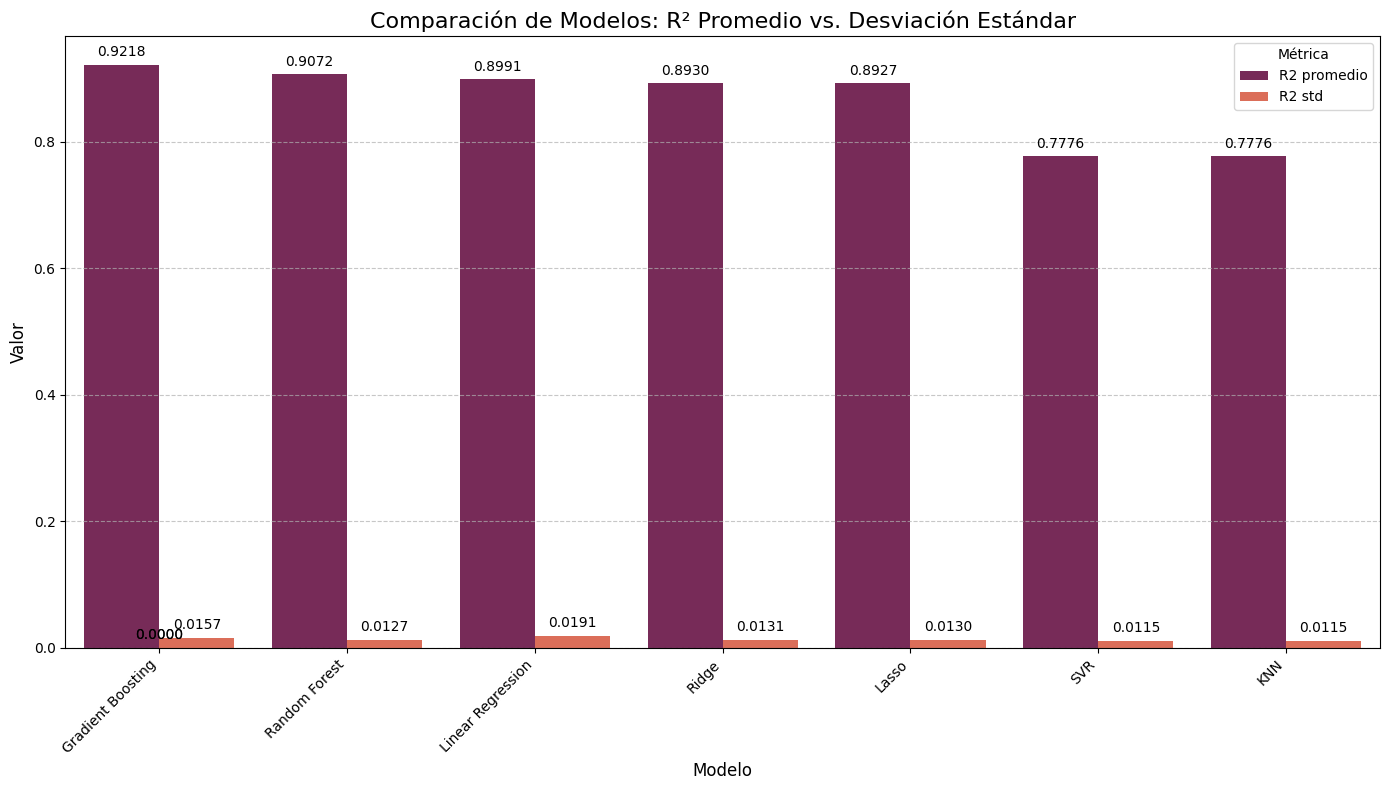

In [425]:
#Graficar resultados_r2 con respecto a r2 promedio y r2 std

# Reorganizar el DataFrame de ancho a largo
df_long = pd.melt(resultados_r2, id_vars=['Modelo'], var_name='Métrica', value_name='Valor')

# Ordenar los modelos por su R2 promedio para que el gráfico sea más fácil de leer
df_long['Modelo'] = pd.Categorical(df_long['Modelo'], categories=resultados_r2['Modelo'][resultados_r2['R2 promedio'].argsort()[::-1]].tolist())
df_long = df_long.sort_values('Modelo')

plt.figure(figsize=(14, 8))

barplot = sns.barplot(x='Modelo',y='Valor',hue='Métrica',data=df_long, palette='rocket')

# Añadir las etiquetas de valor
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.4f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 9),
        textcoords='offset points'
    )

# Personalizar el gráfico
plt.title('Comparación de Modelos: R² Promedio vs. Desviación Estándar', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()